In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None) 
pd.set_option('mode.chained_assignment', None)
# pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv('app/data/polling/president_primary_polls.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,office_type,start_date,end_date,sponsor_candidate,internal,partisan,tracking,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,121552,65756,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,YouGov,B-,585,lv,lv-d,Online,U.S. President,4/12/20,4/14/20,NaN,False,NaN,False,False,4/15/20 09:11,NaN,https://docs.cdn.yougov.com/6fdl23u606/econTabReport.pdf,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0
1,121552,65756,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,YouGov,B-,585,lv,lv-d,Online,U.S. President,4/12/20,4/14/20,NaN,False,NaN,False,False,4/15/20 09:11,NaN,https://docs.cdn.yougov.com/6fdl23u606/econTabReport.pdf,primary,DEM,Sanders,13257,Bernard Sanders,31.0
2,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,YouGov,B-,586,lv,lv-d,Online,U.S. President,4/5/20,4/7/20,NaN,False,NaN,False,False,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTabReport.pdf,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0
3,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,YouGov,B-,586,lv,lv-d,Online,U.S. President,4/5/20,4/7/20,NaN,False,NaN,False,False,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTabReport.pdf,primary,DEM,Sanders,13257,Bernard Sanders,28.0
4,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,SSRS,A/B,462,rv,rv-d,Live Phone,U.S. President,4/3/20,4/6/20,NaN,False,NaN,False,False,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4c.-.2020.pdf,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18636,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,Harris Insights & Analytics,C+,370,rv,rv-d,Online,U.S. President,11/5/18,11/6/18,NaN,False,NaN,False,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-thinking/415500-biden-leads-dem-voters-list-of-potential-2020-contenders-poll,primary,DEM,Sanders,13257,Bernard Sanders,20.0
18637,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,Harris Insights & Analytics,C+,370,rv,rv-d,Online,U.S. President,11/5/18,11/6/18,NaN,False,NaN,False,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-thinking/415500-biden-leads-dem-voters-list-of-potential-2020-contenders-poll,primary,DEM,Booker,13287,Cory A. Booker,5.0
18638,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,Harris Insights & Analytics,C+,370,rv,rv-d,Online,U.S. President,11/5/18,11/6/18,NaN,False,NaN,False,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-thinking/415500-biden-leads-dem-voters-list-of-potential-2020-contenders-poll,primary,DEM,Harris,13288,Kamala D. Harris,5.0
18639,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,Harris Insights & Analytics,C+,370,rv,rv-d,Online,U.S. President,11/5/18,11/6/18,NaN,False,NaN,False,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-thinking/415500-biden-leads-dem-voters-list-of-potential-2020-contenders-poll,primary,DEM,Bloomberg,13289,Michael Bloomberg,5.0


In [4]:
c = {'John Delaney', 'Kamala Harris', 'Amy Klobuchar', 'Andrew Yang', 'Bernie Sanders', 'Elizabeth Warren', 
     'Joe Biden', 'Pete Buttigieg', 'Tom Steyer', 'Mike Bloomberg', 'Bill de Blasio', 'Cory Booker', 'Jay Inslee', 
     'Julián Castro', 'Kirsten Gillibrand', 'Michael Bennet', 'Tulsi Gabbard', 'Eric Swalwell', 'John Hickenlooper', 
     'Marianne Williamson', 'Beto O\'Rourke', 'Steve Bullock', 'Tim Ryan', 'Pete Buttigieig'}
candidates = set(df.answer).intersection({x.split(' ')[-1] for x in c})
df_filtered = df[~(df.fte_grade.str.contains('C') | df.fte_grade.str.contains('D'))]

df_filtered = df_filtered[df.answer.isin(candidates)]

df_filtered = df_filtered[df.state.isnull()]

df_filtered = df_filtered[['created_at', 'answer', 'pct']]

df_filtered.created_at = pd.to_datetime(df_filtered.created_at)
df_filtered = df_filtered.groupby(by=['created_at', 'answer']).mean().reset_index()
df_filtered = df_filtered.sort_values(by=['created_at'])

df_filtered

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,created_at,answer,pct
0,2018-12-27 03:58:00,Biden,25.5
1,2018-12-27 03:58:00,Harris,8.5
2,2018-12-27 03:58:00,O'Rourke,15.1
3,2018-12-27 03:58:00,Sanders,22.0
4,2018-12-27 03:58:00,Warren,6.9
...,...,...,...
3248,2020-04-11 19:09:00,Biden,38.0
3250,2020-04-11 19:09:00,Buttigieg,4.0
3254,2020-04-11 19:09:00,Warren,8.0
3255,2020-04-15 09:11:00,Biden,49.0


In [ ]:
def get_temp(df, x):
    temp = df_filtered[df_filtered.answer == x]
    temp = temp.set_index(temp.created_at)
    temp['avg_pct'] = temp.pct.rolling(20, min_periods=1, center=True).mean()
    temp = temp[(temp.pct > temp.avg_pct * 1/2) & (temp.pct < temp.avg_pct * 3/2)]

    temp['avg_pct'] = temp.pct.rolling(20, min_periods=1, center=True).mean()
    temp['avg_pct'] = temp.avg_pct.rolling(20, min_periods=1, center=True).mean()
    
    return temp

In [10]:
# def func(series):
#     return (max(series) - min(series)) / min(series) * 100

# def do_derivative(temp):
#     temp = temp.set_index(temp.created_at)
#     temp['changed'] = temp.avg_pct.rolling(pd.Timedelta(days=15)).apply(func)
#     return temp


# for x in set(df_filtered.answer):
#     temp = get_temp(df_filtered, x)
#     temp = do_derivative(temp)

#     ax = plt.gca()

#     temp.plot(kind='line', x='created_at', y='avg_pct', label=x, ax=ax, figsize=(30, 30))
#     last_date = None
#     for y in temp[temp.changed > 5].created_at:
#         if last_date is None or last_date + pd.Timedelta(days=30) < y:
#             if last_date is not None:
#                 plt.axvline(last_date, color='red')
#             plt.axvline(y - pd.Timedelta(days=15), color='red')
#         last_date = y

#     if last_date is not None:
#         plt.axvline(last_date, color='red')    
    
#     plt.show()

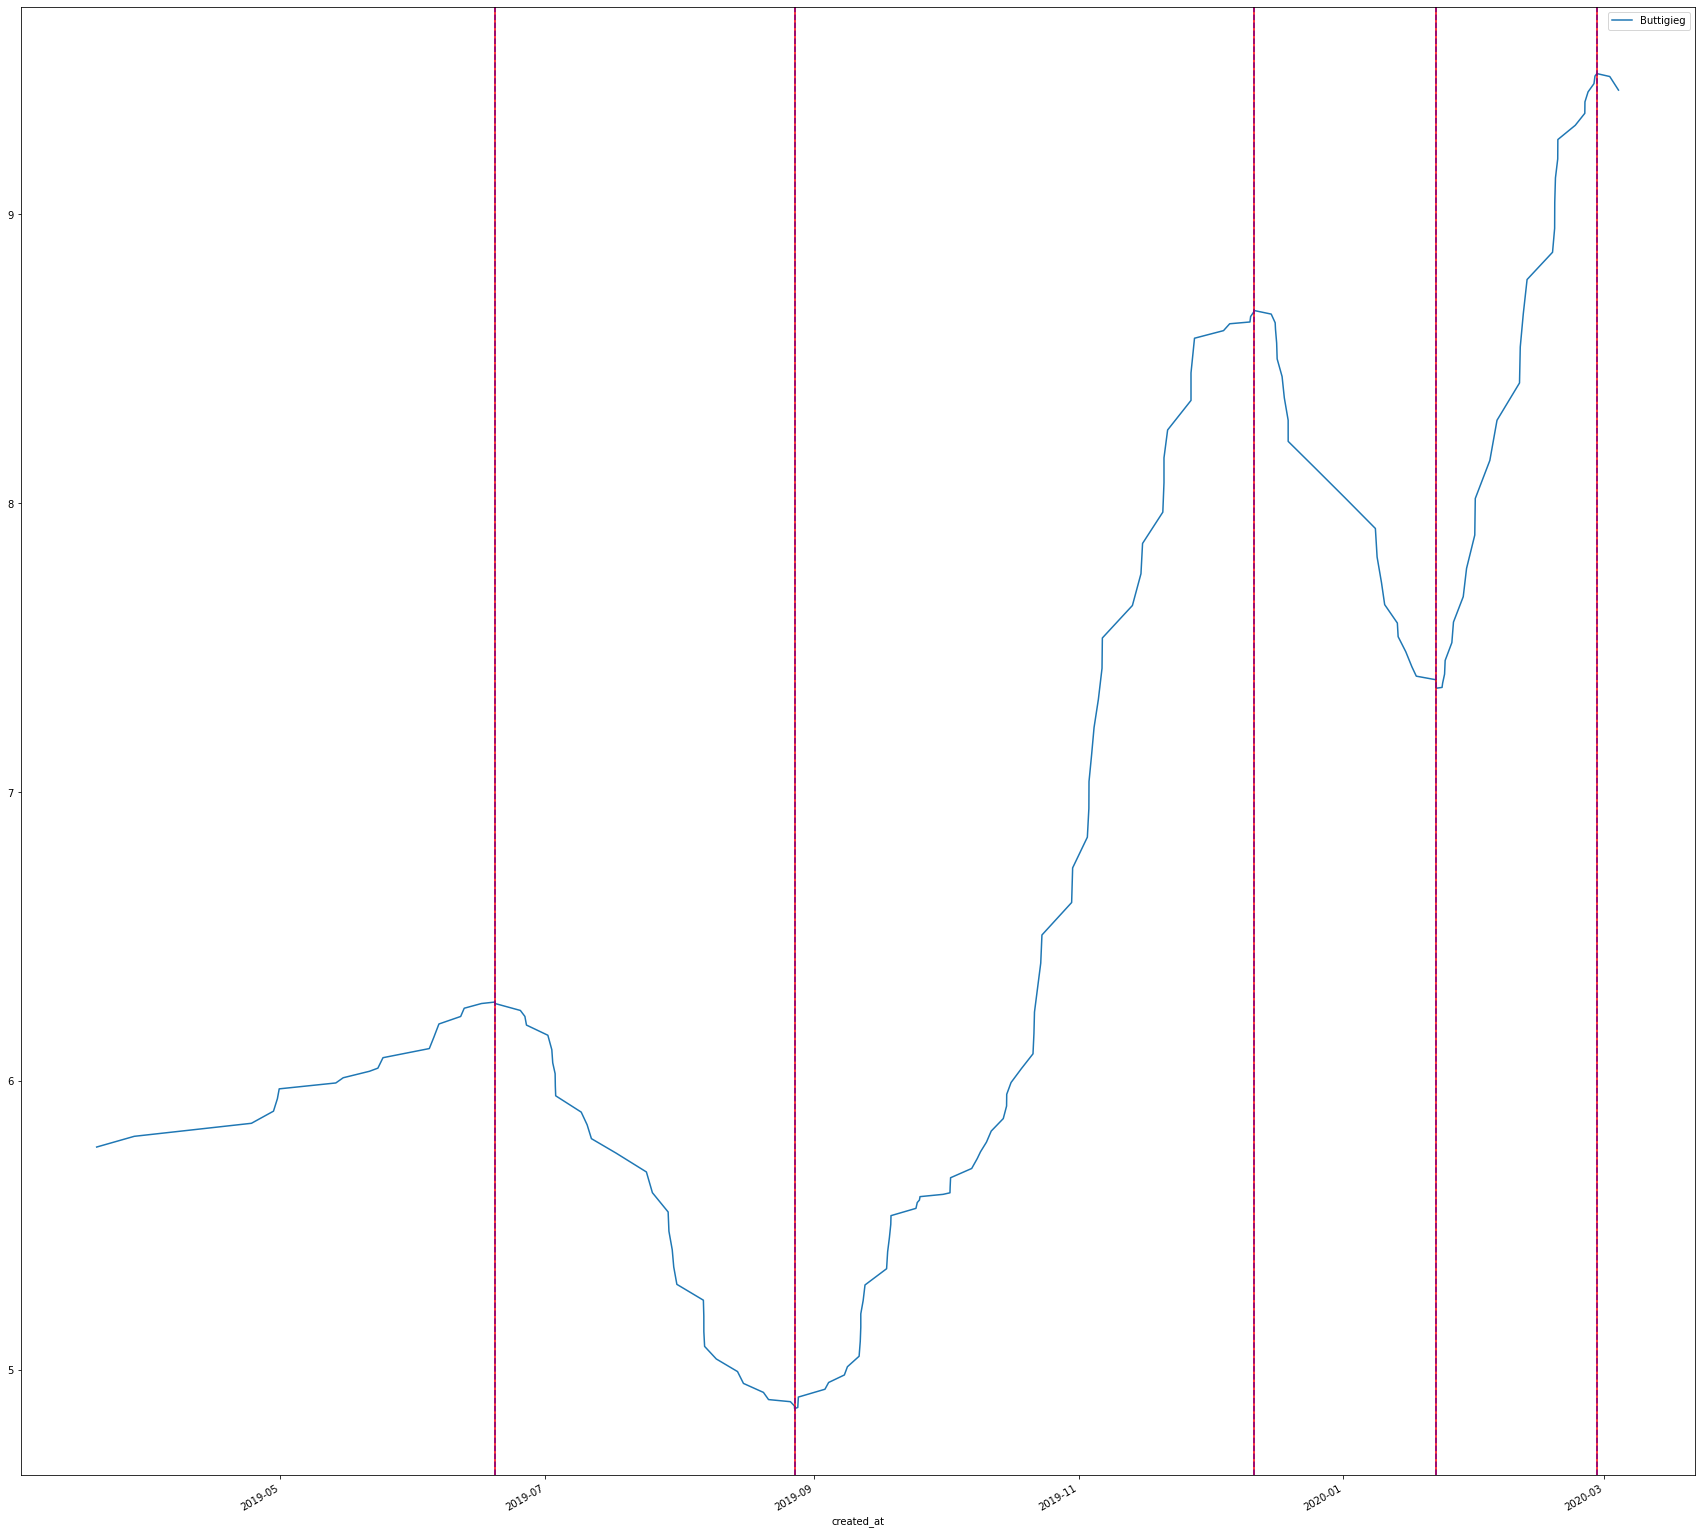

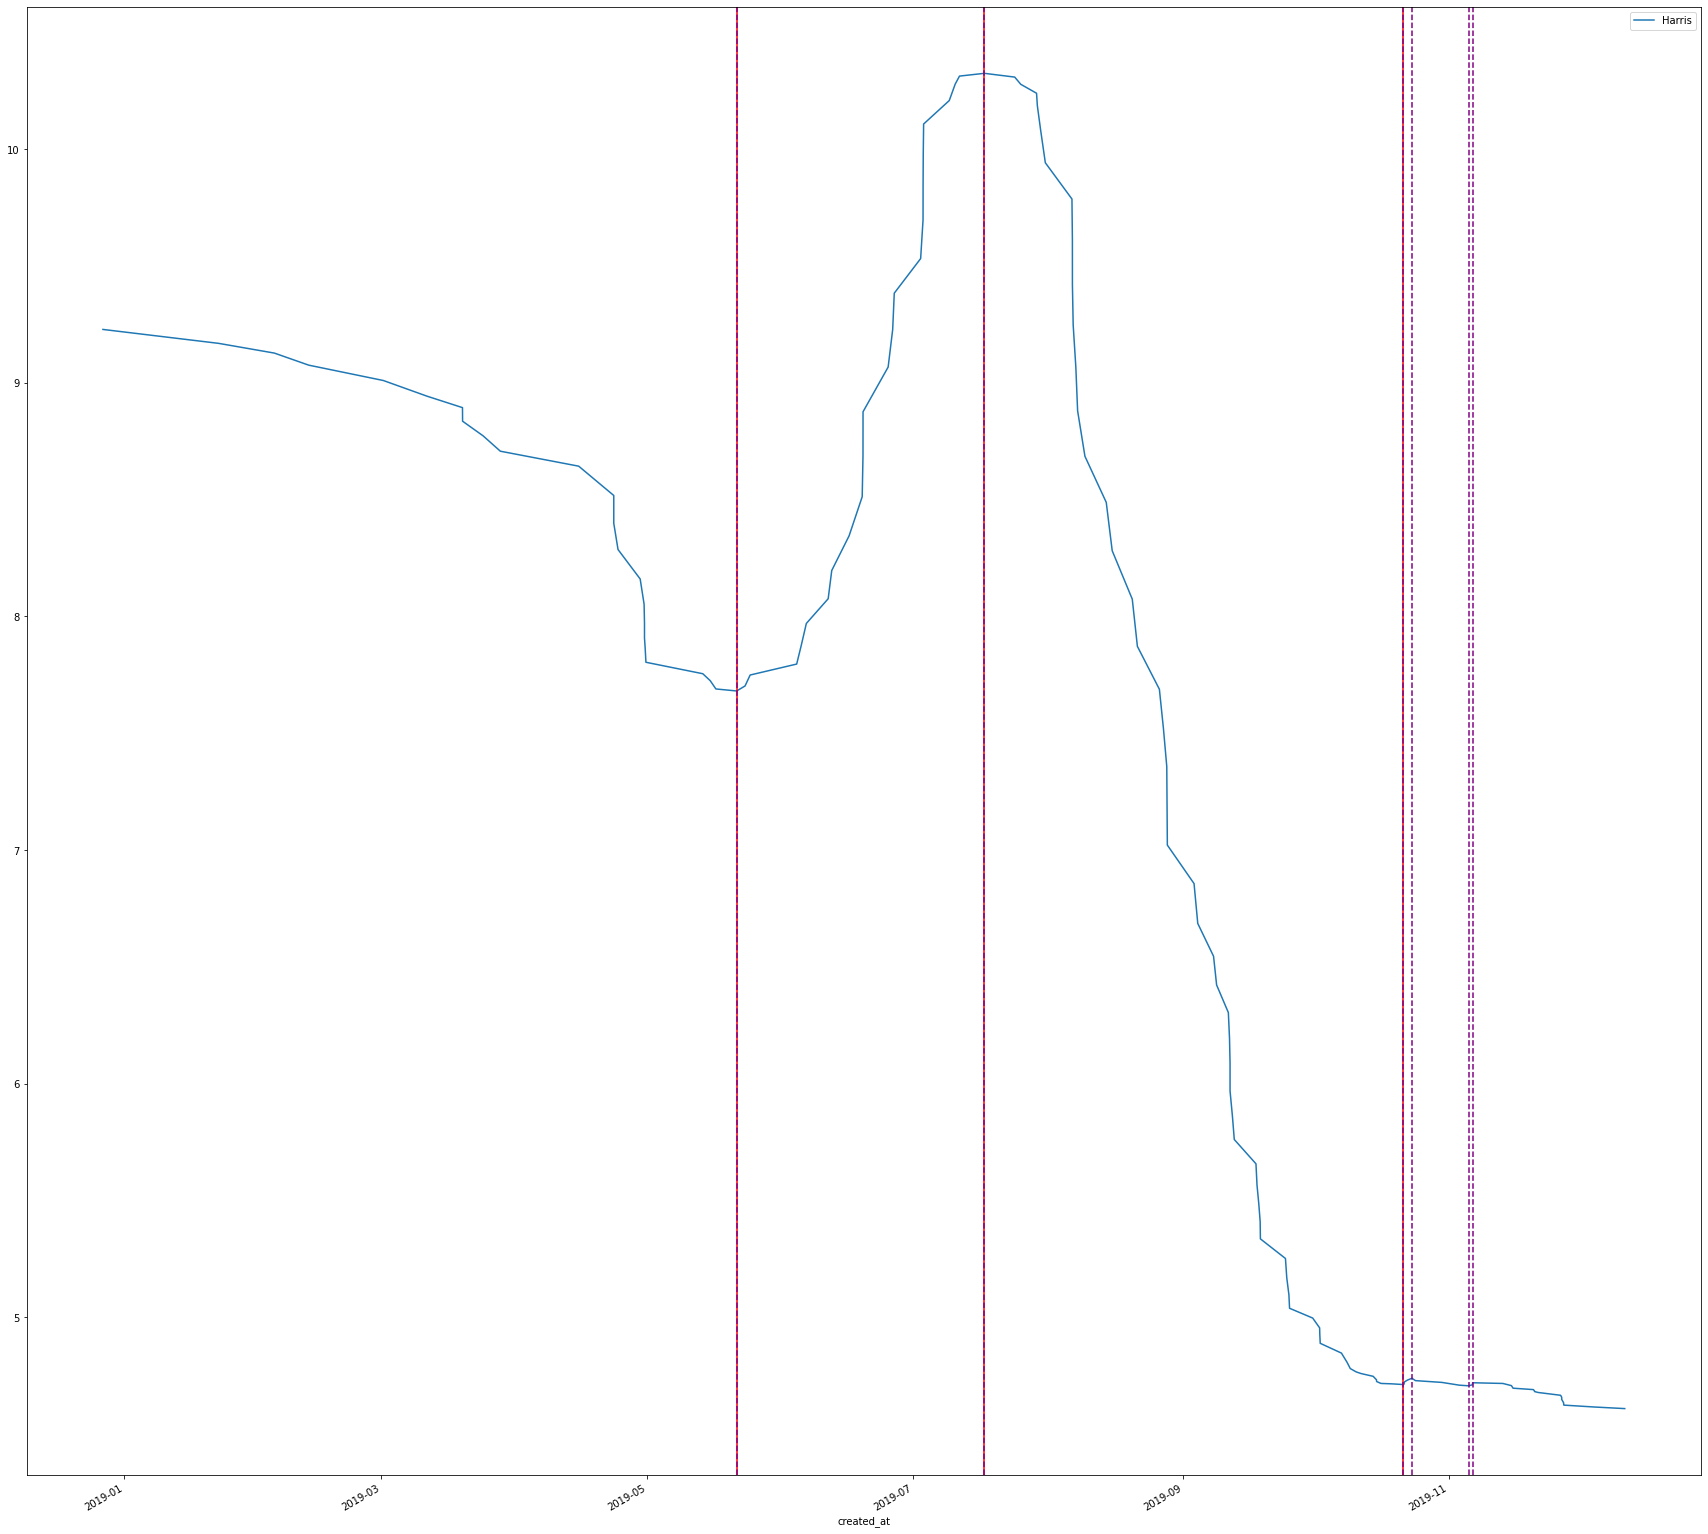

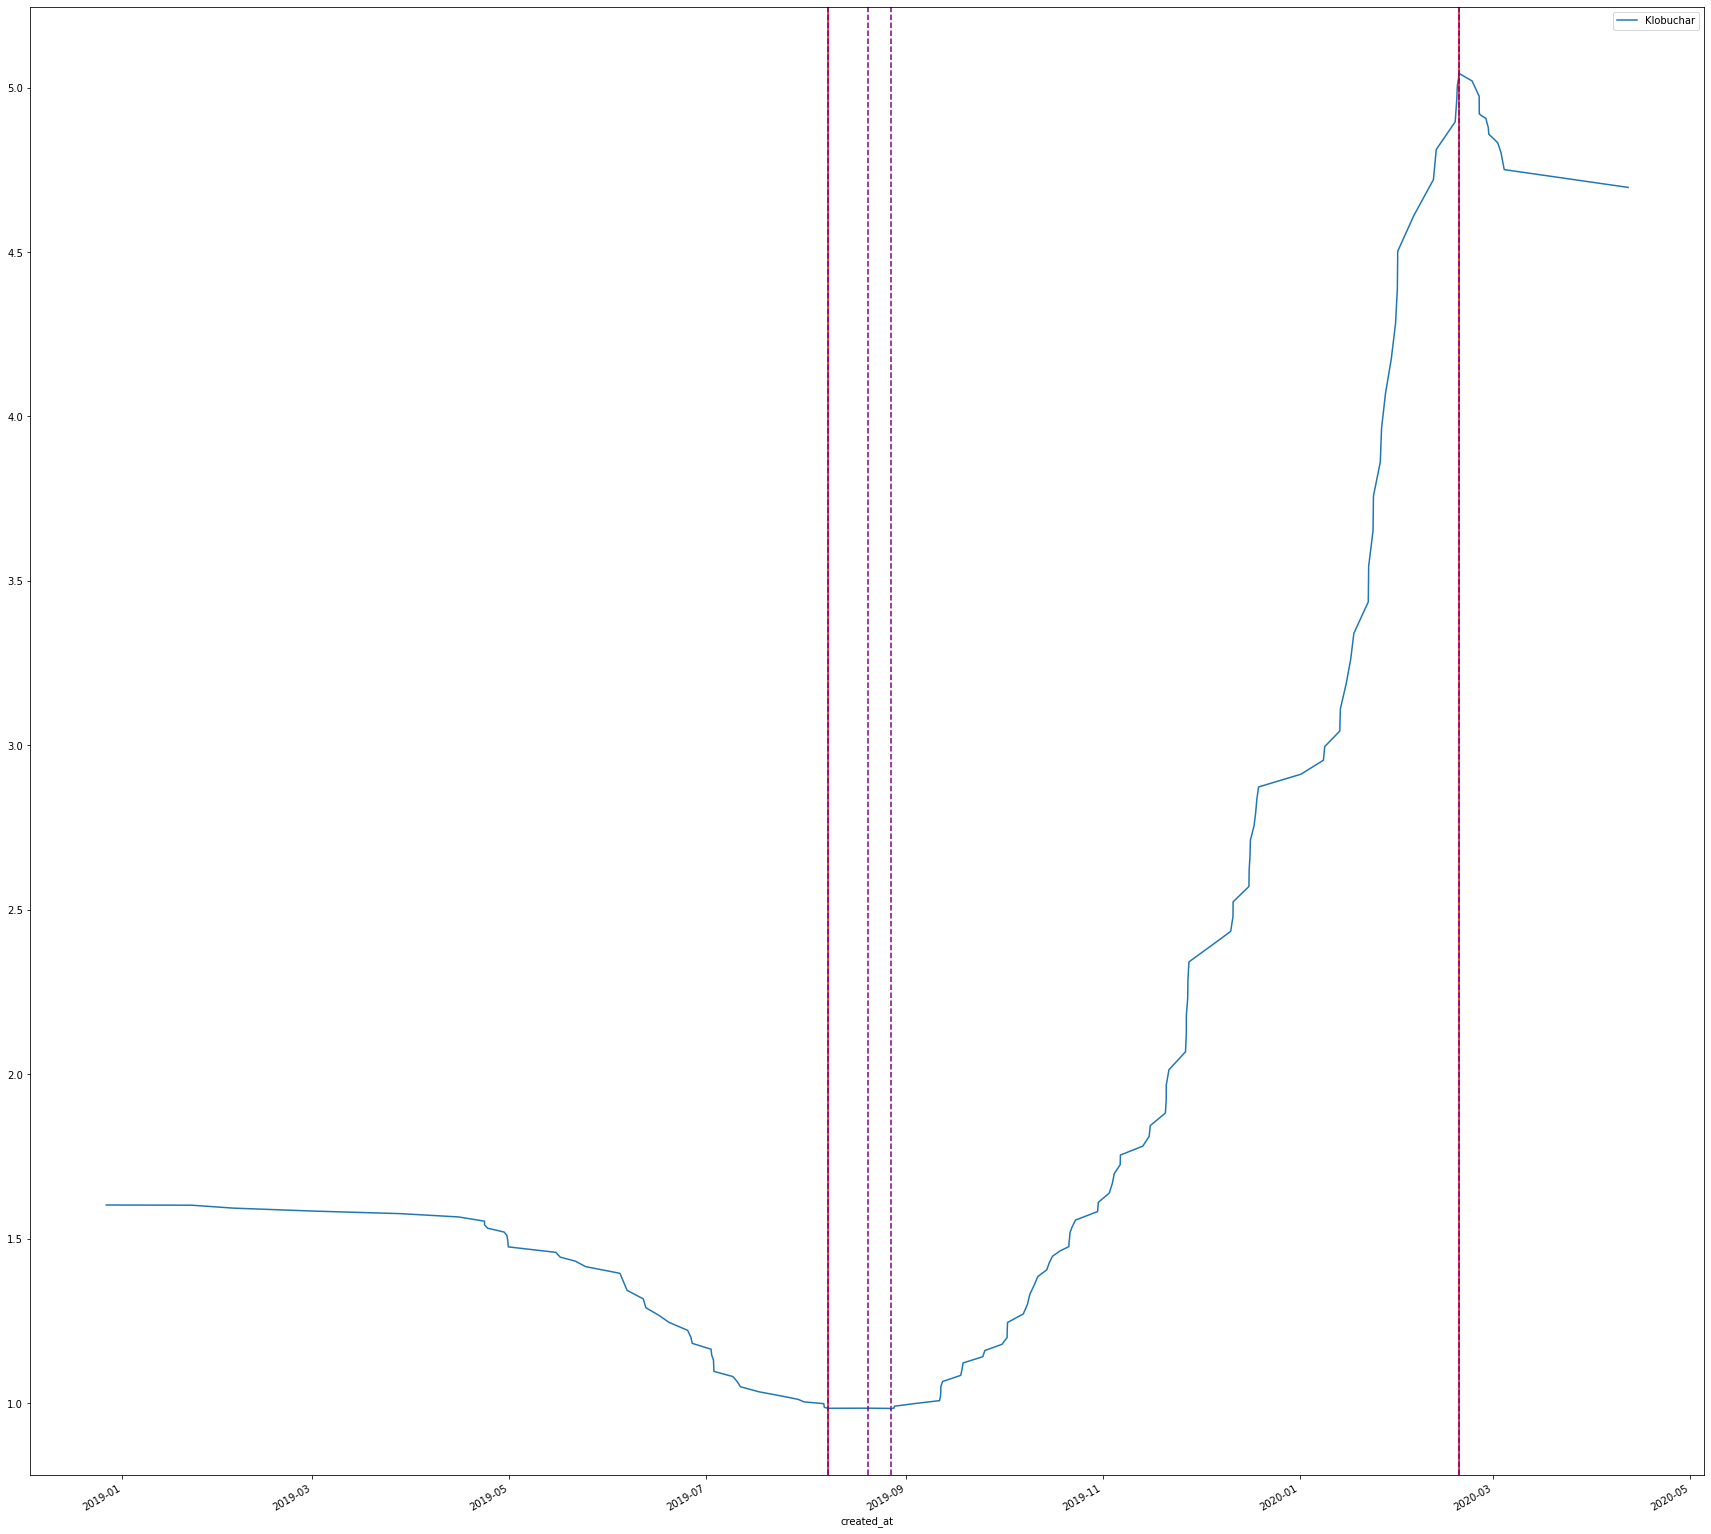

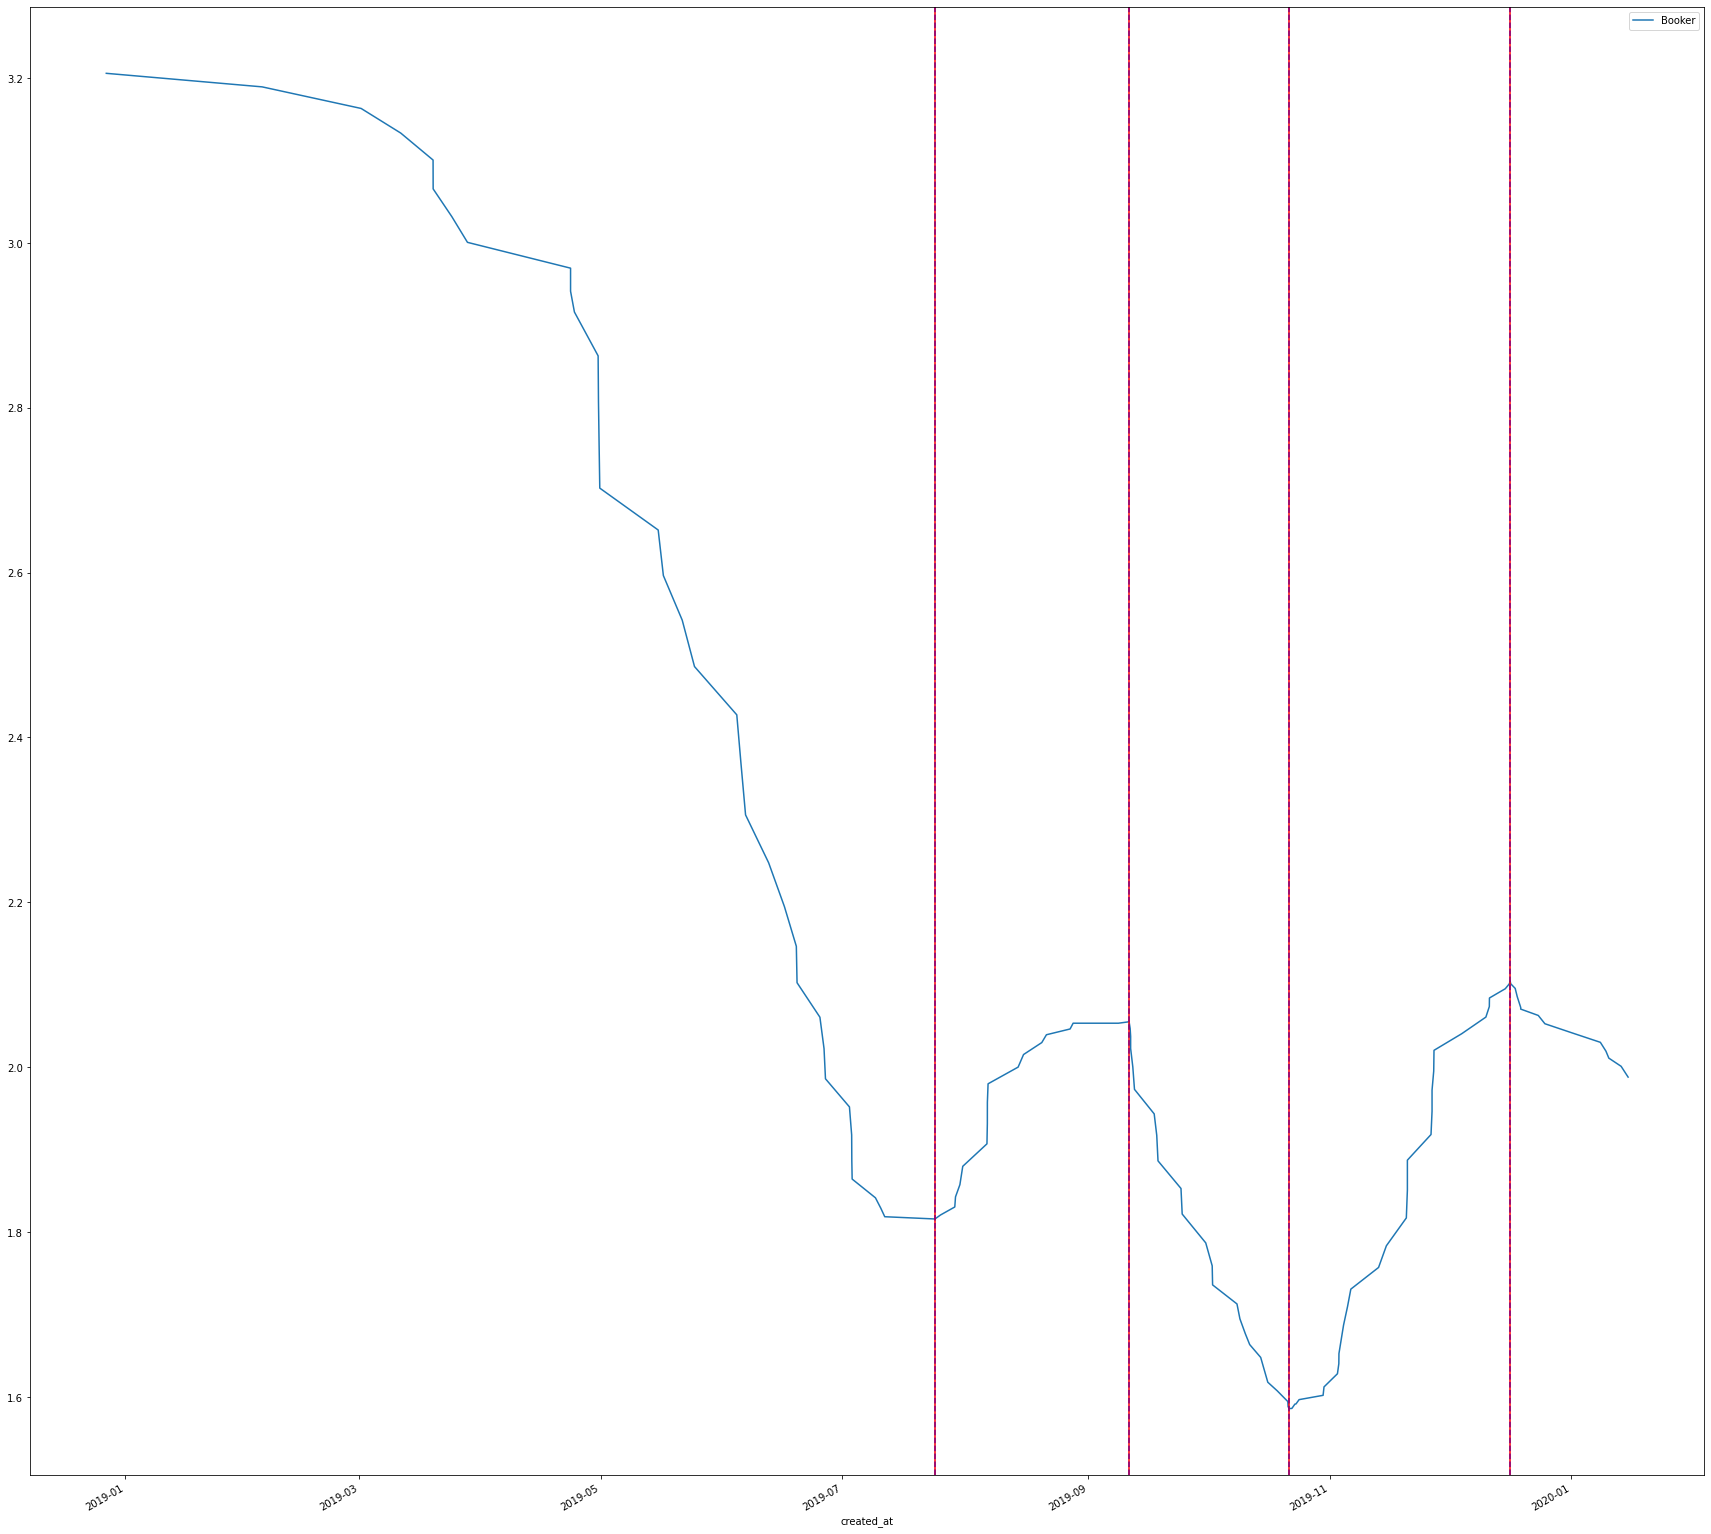

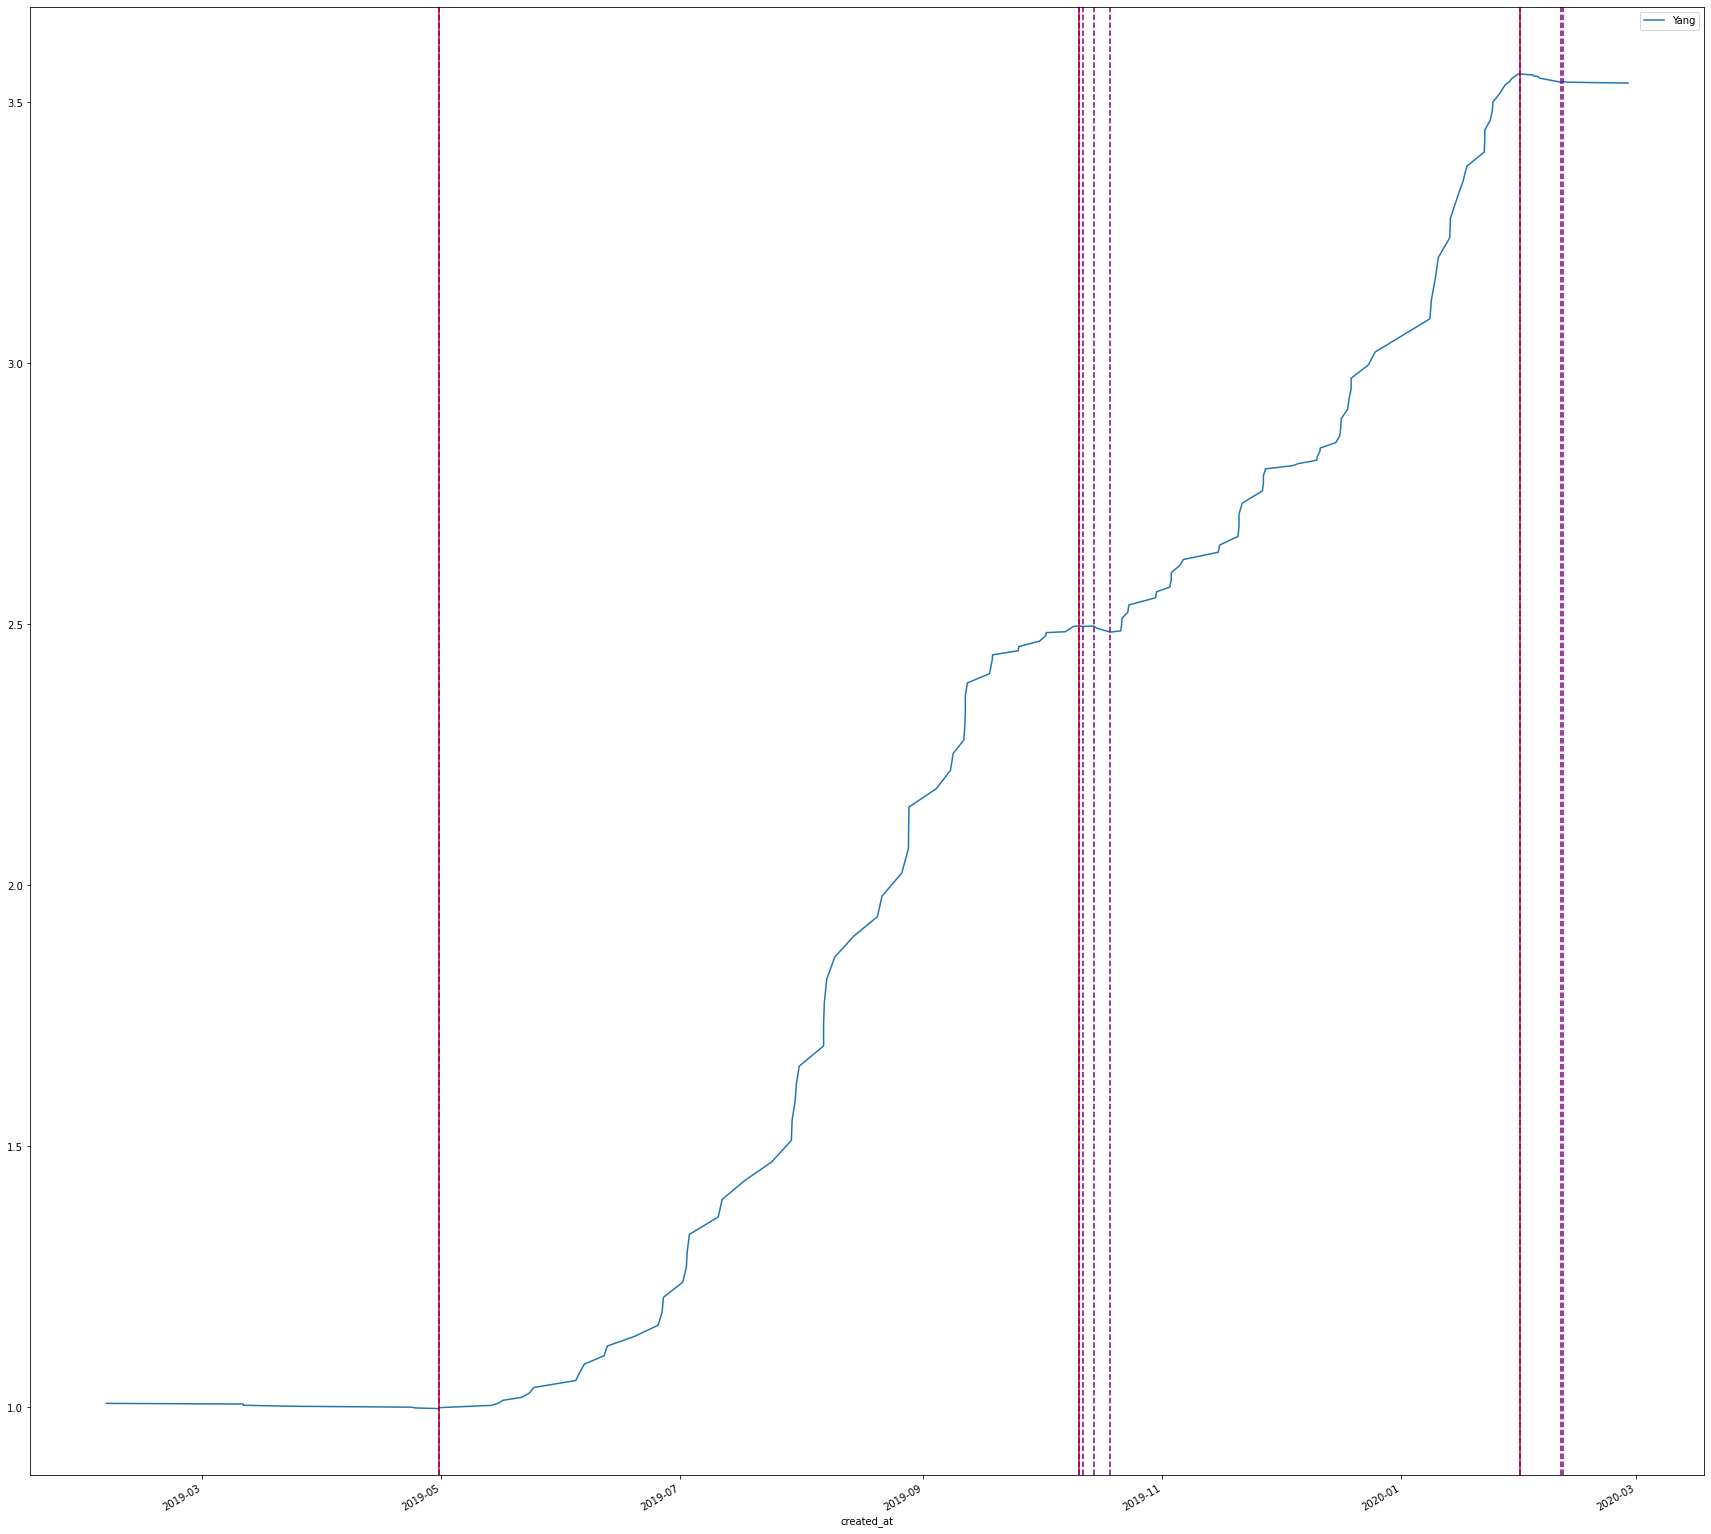

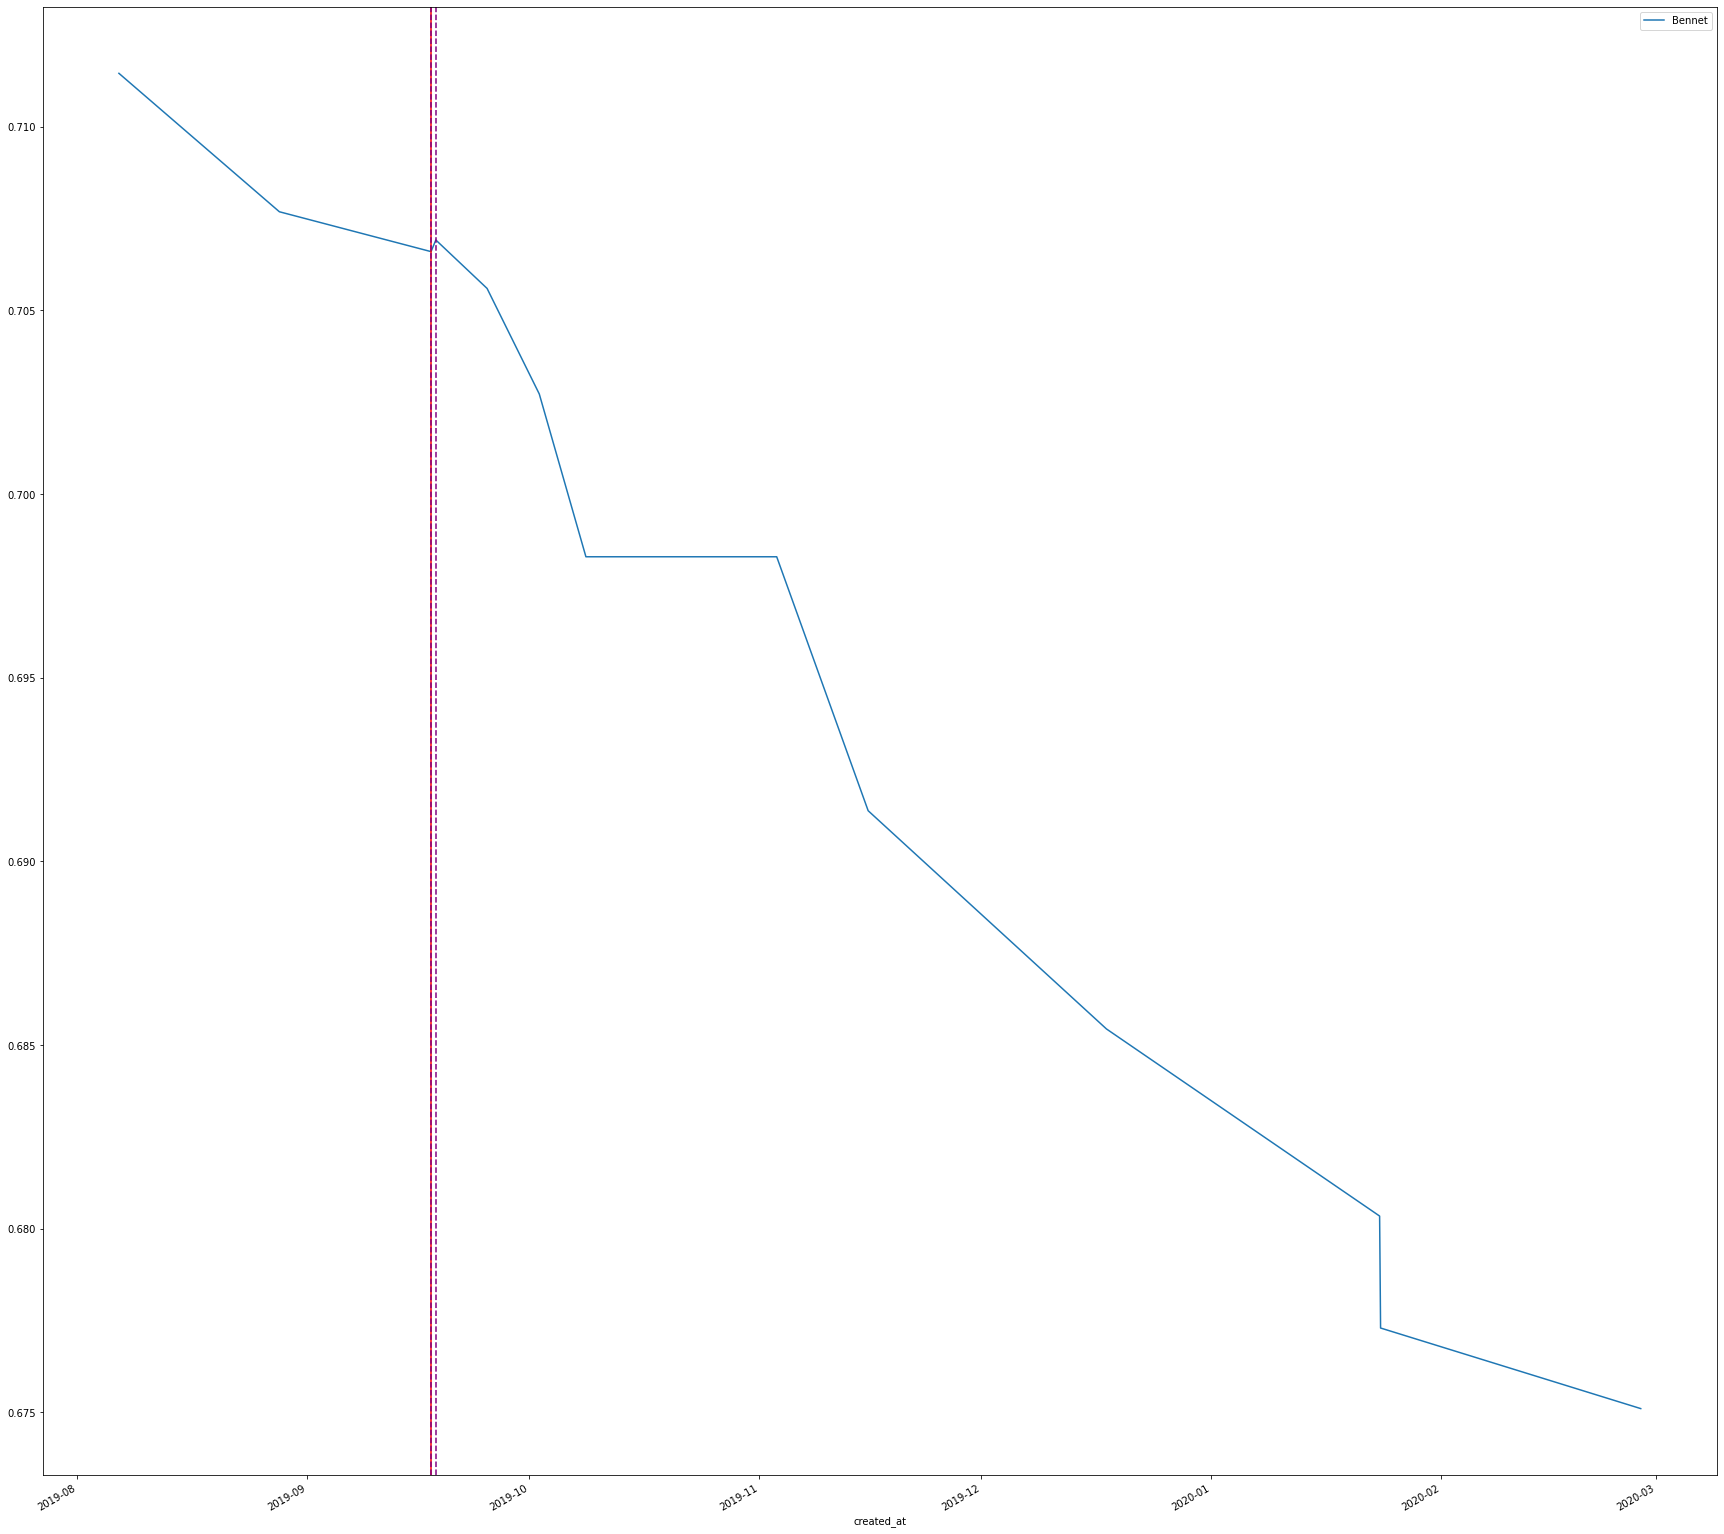

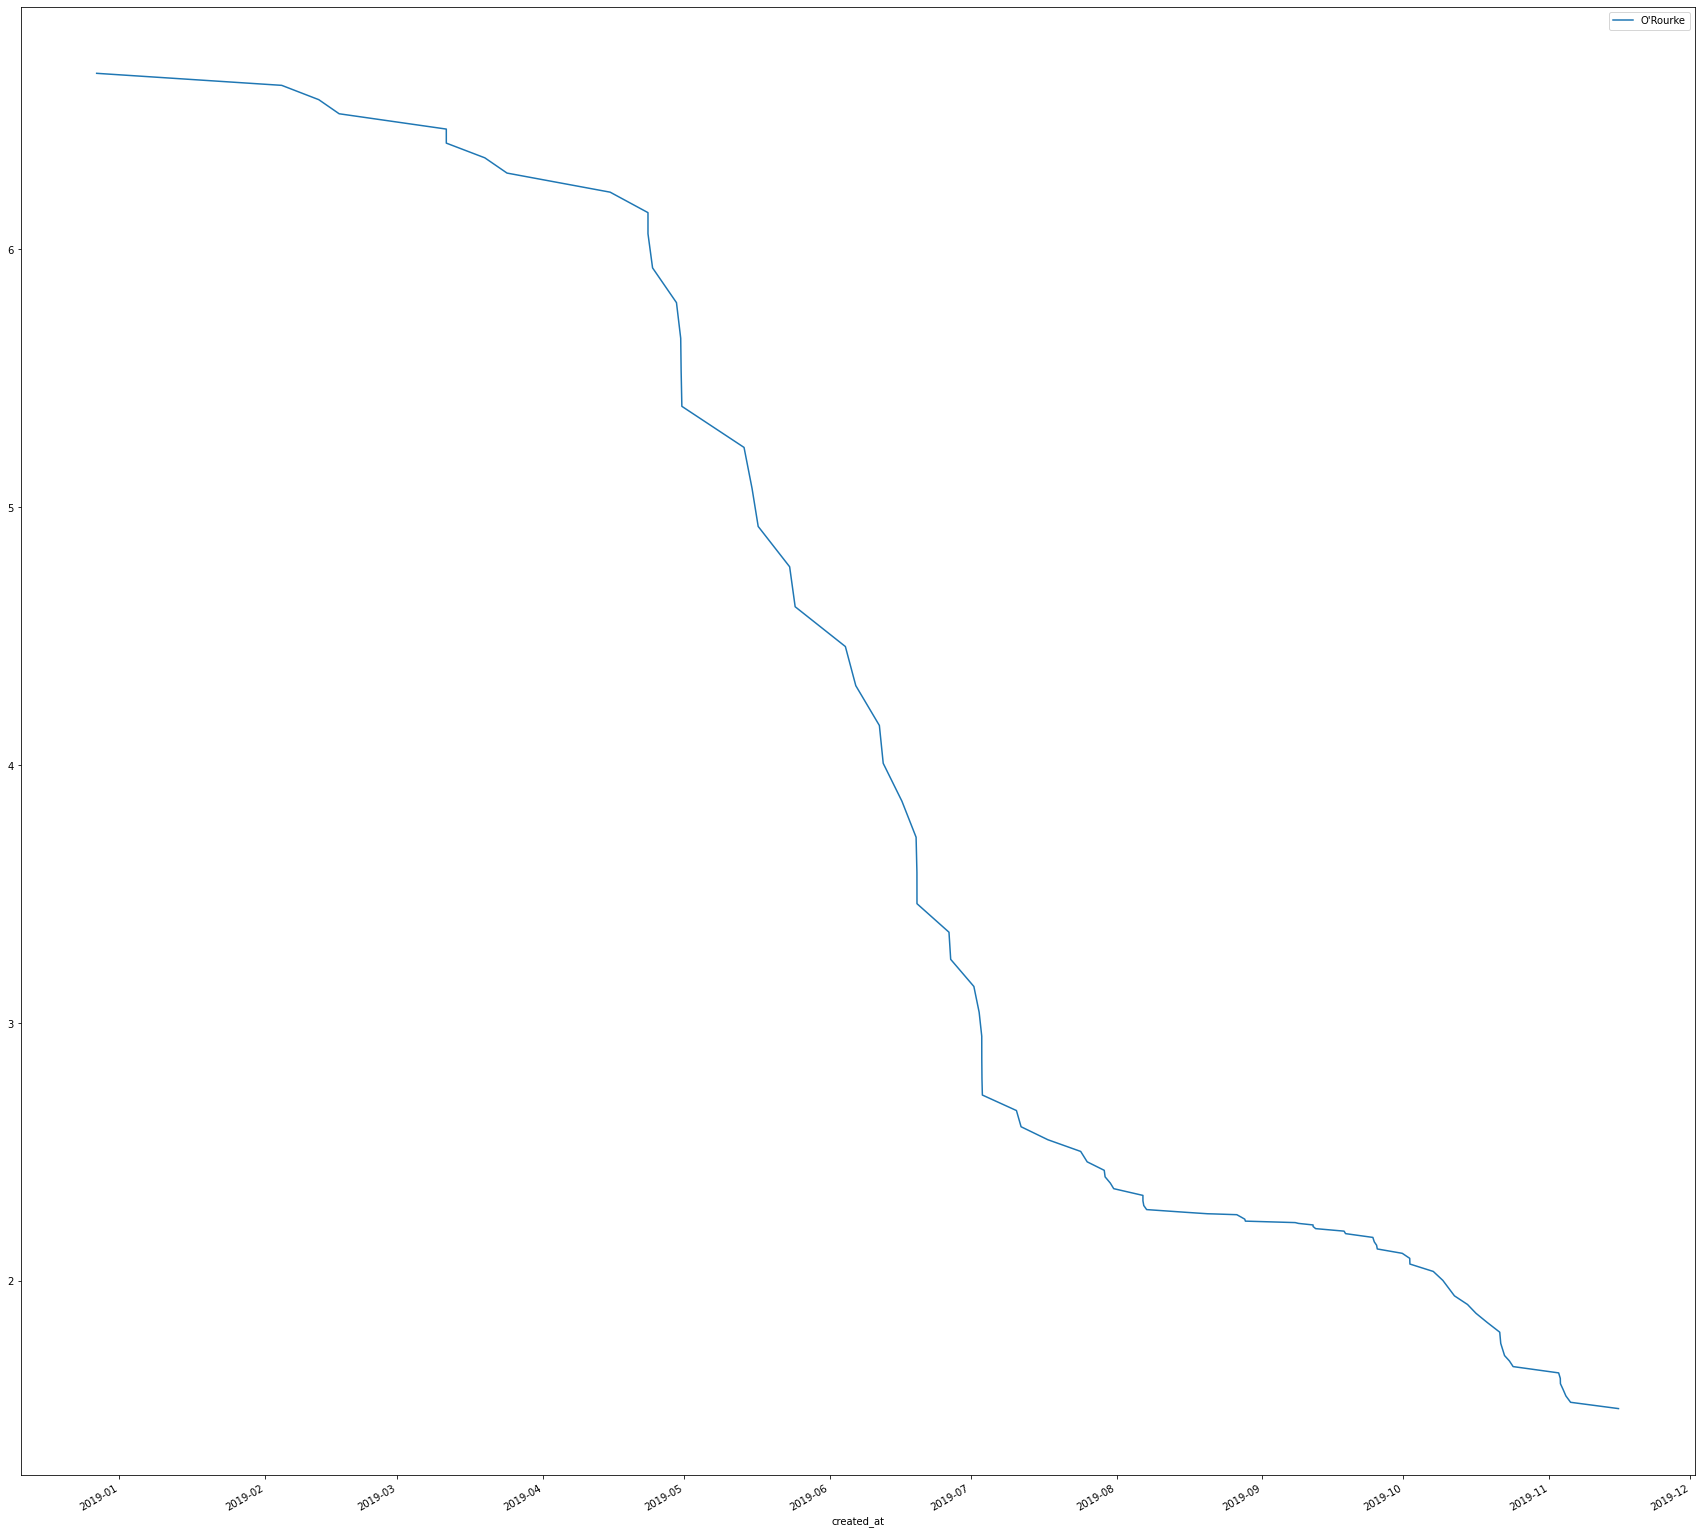

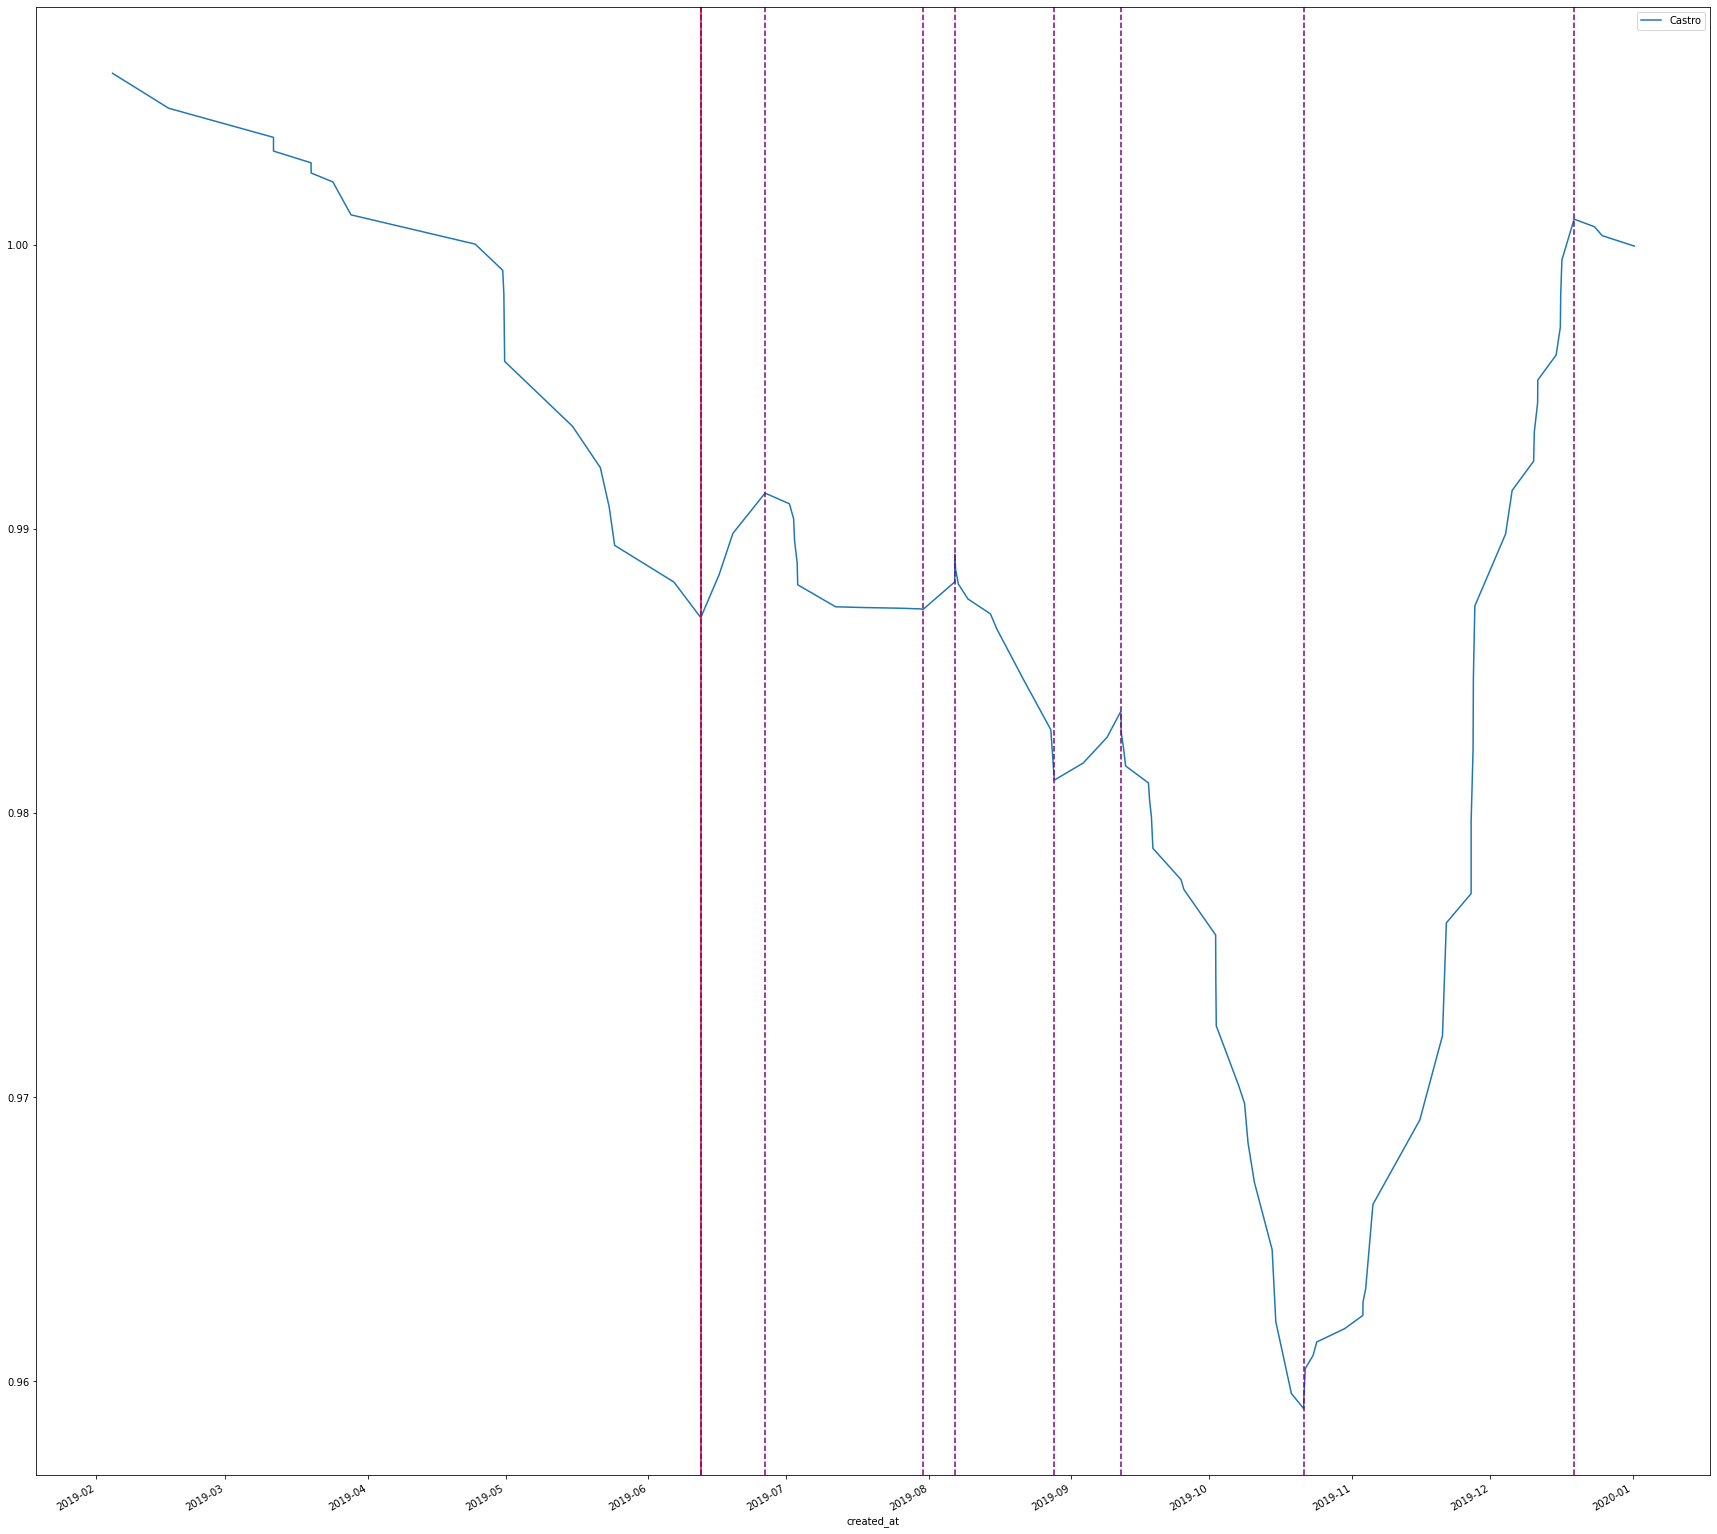

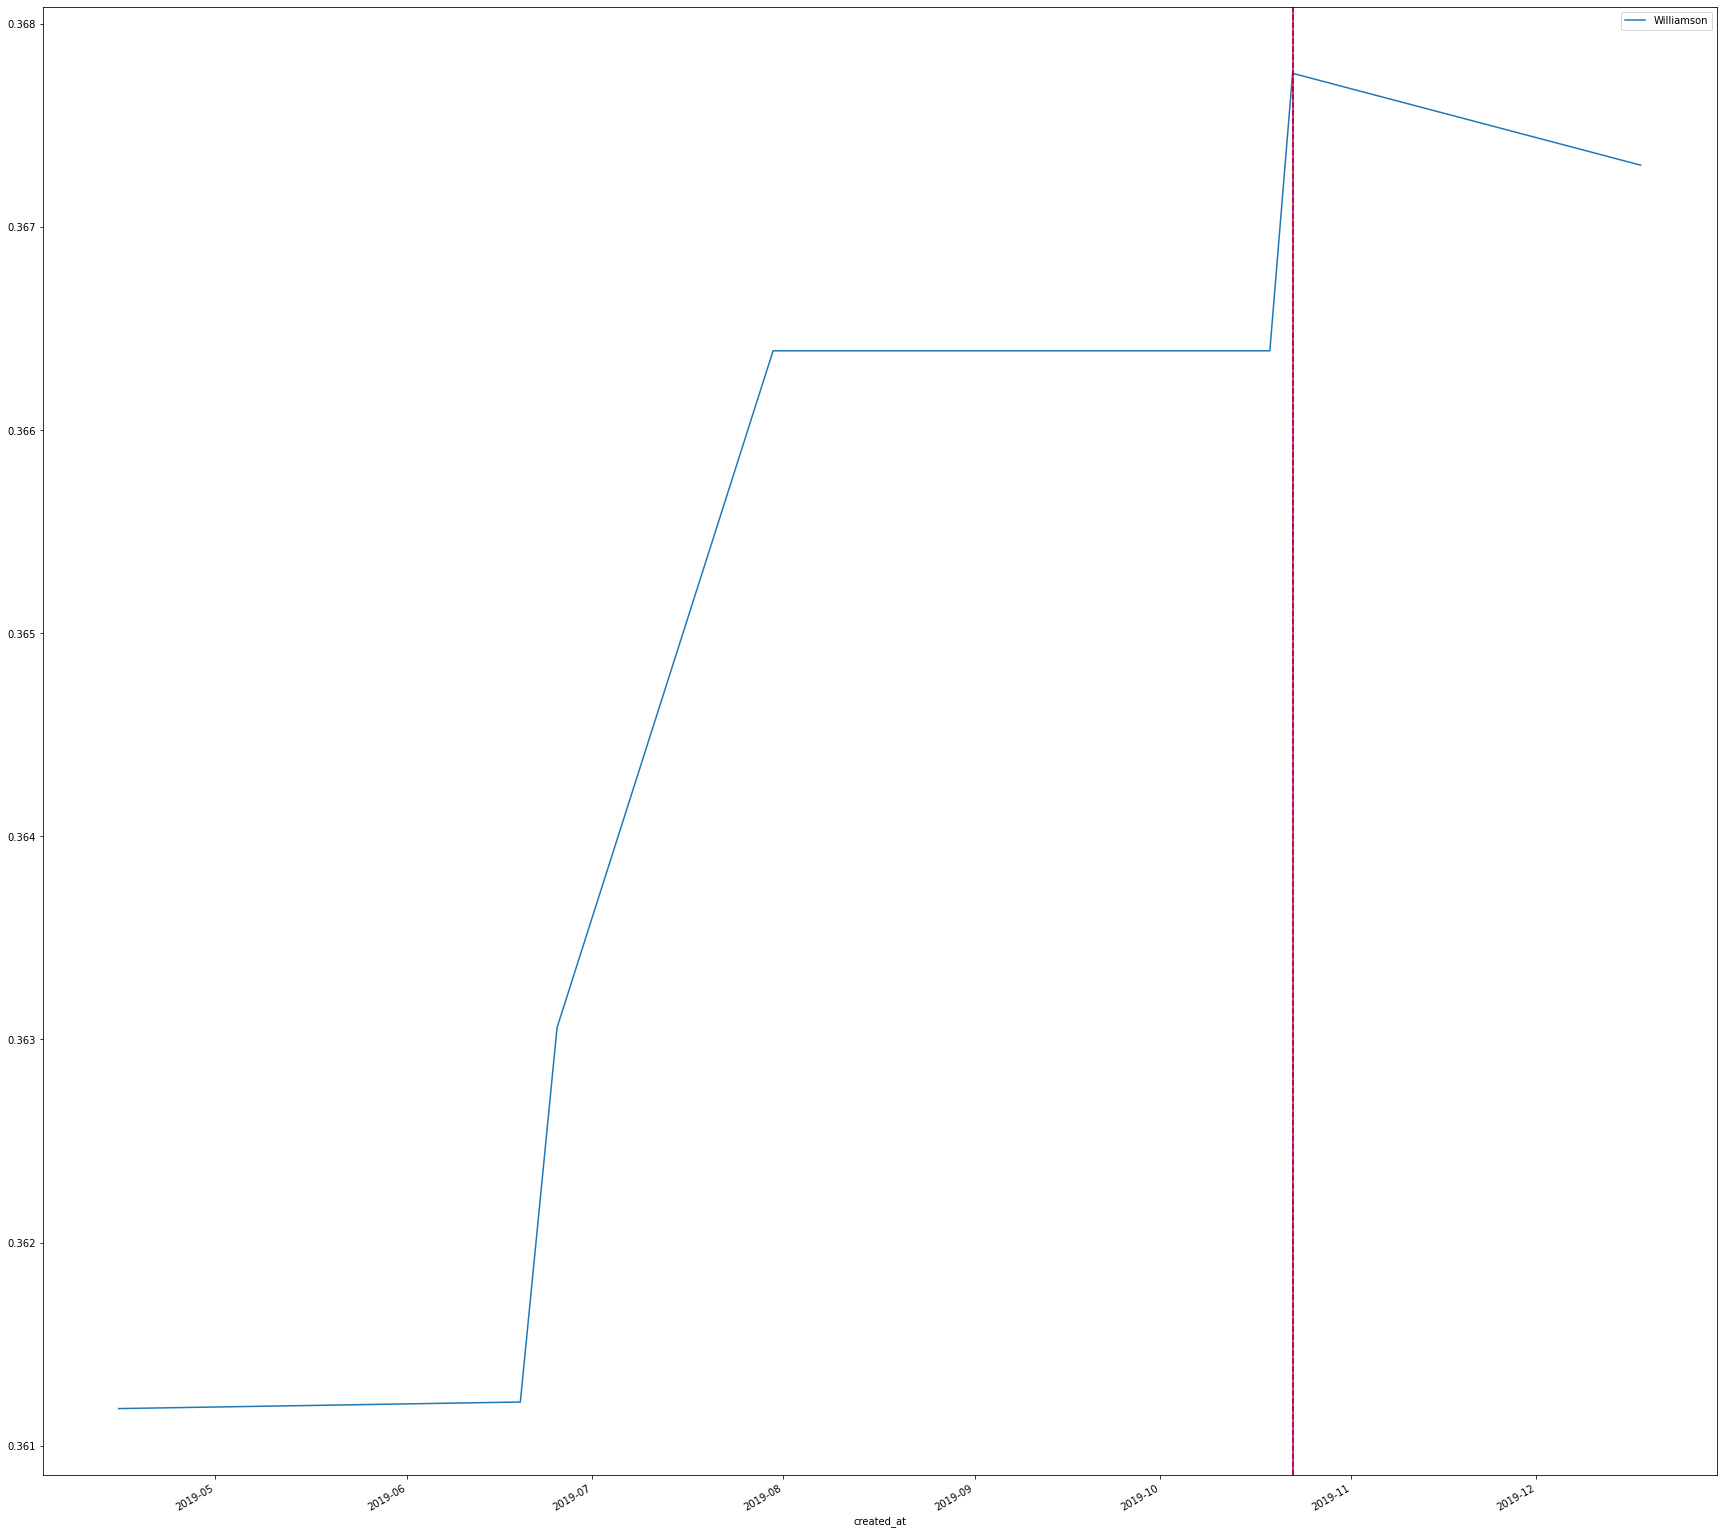

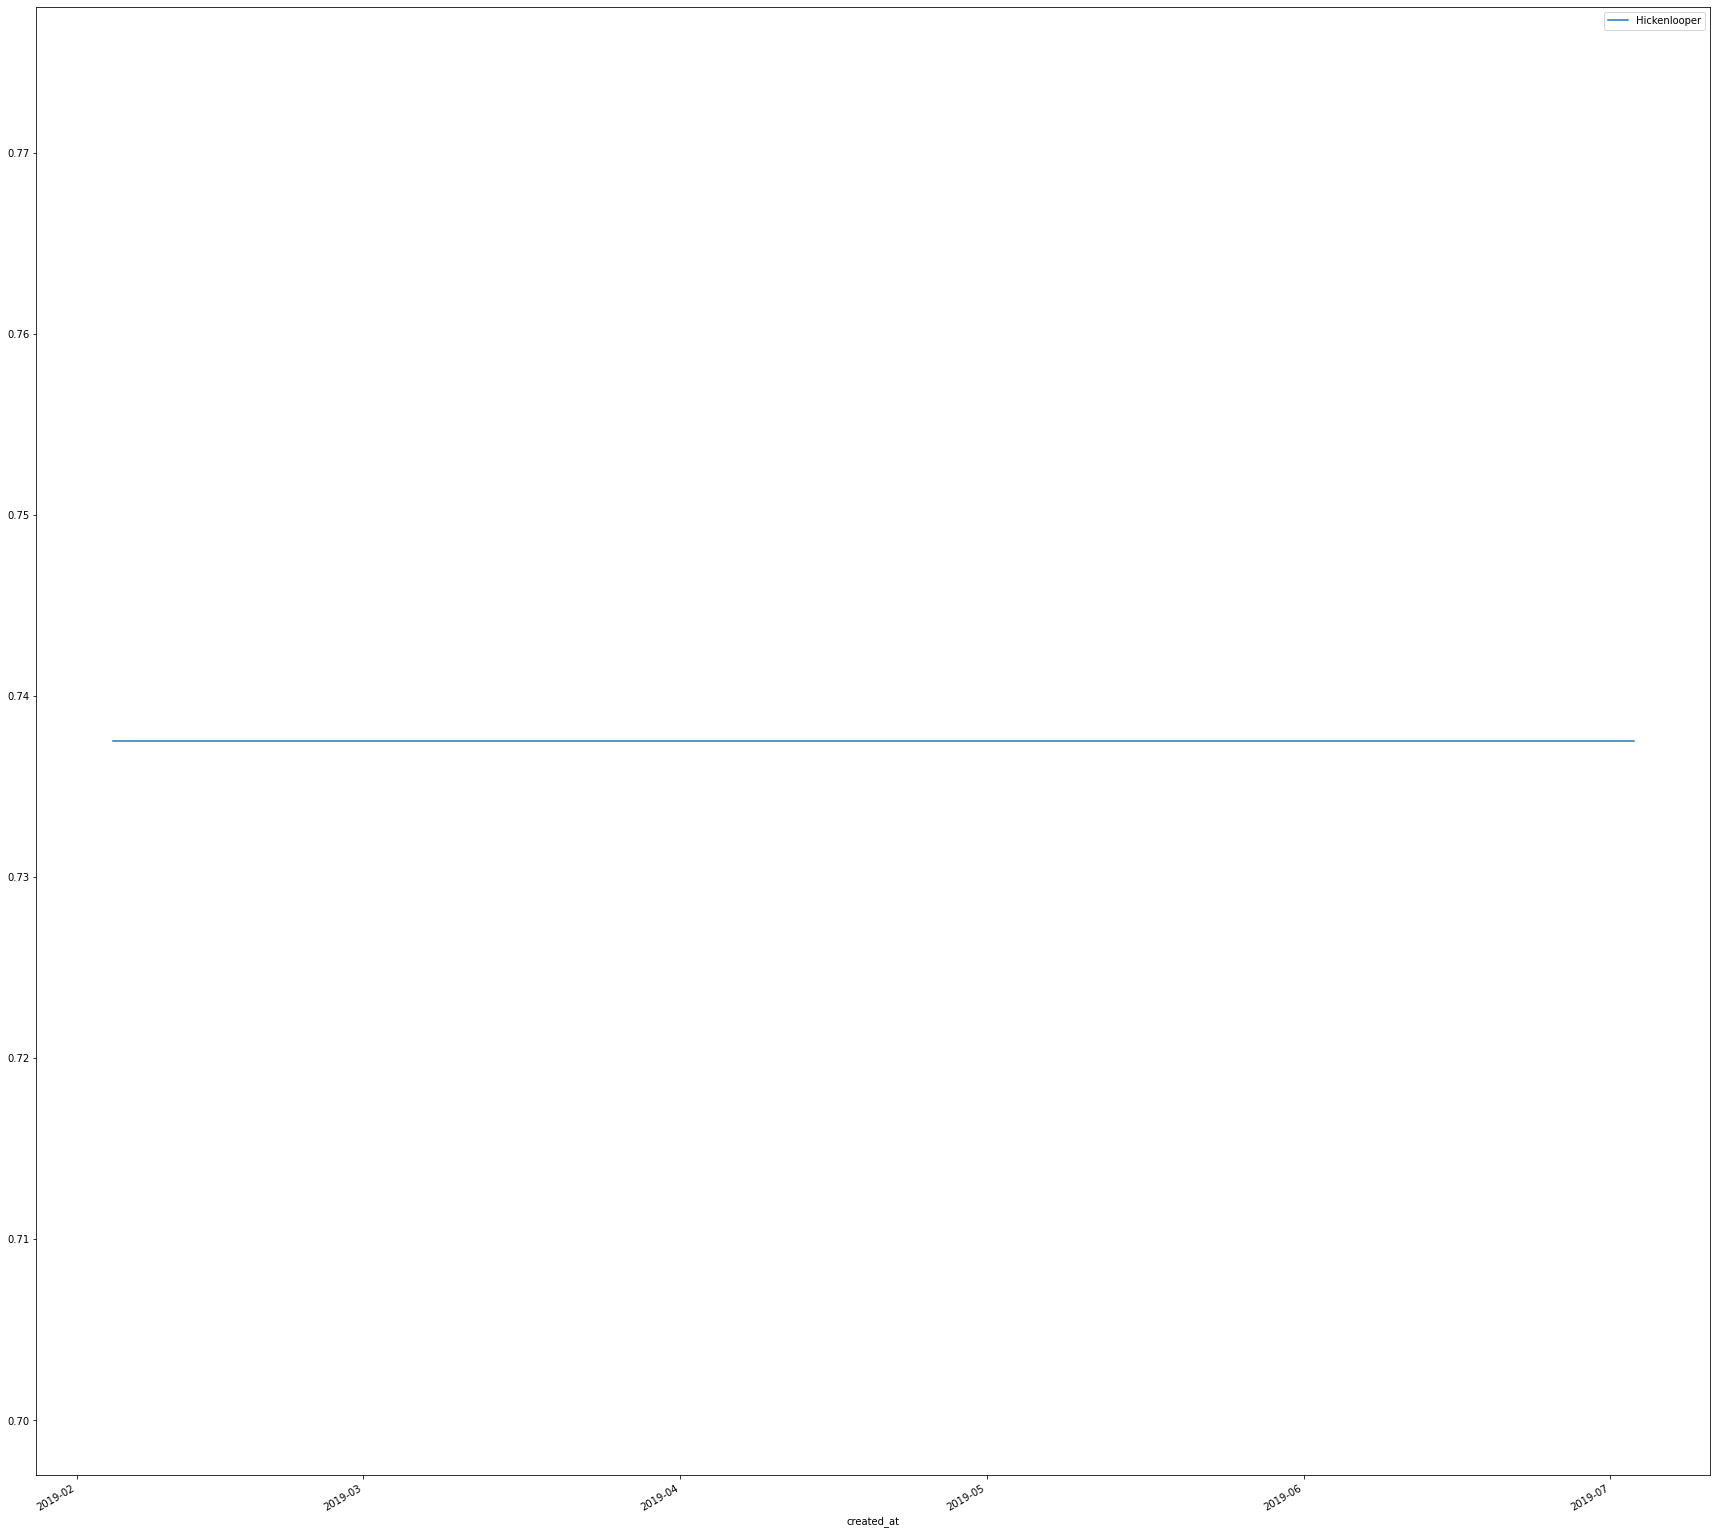

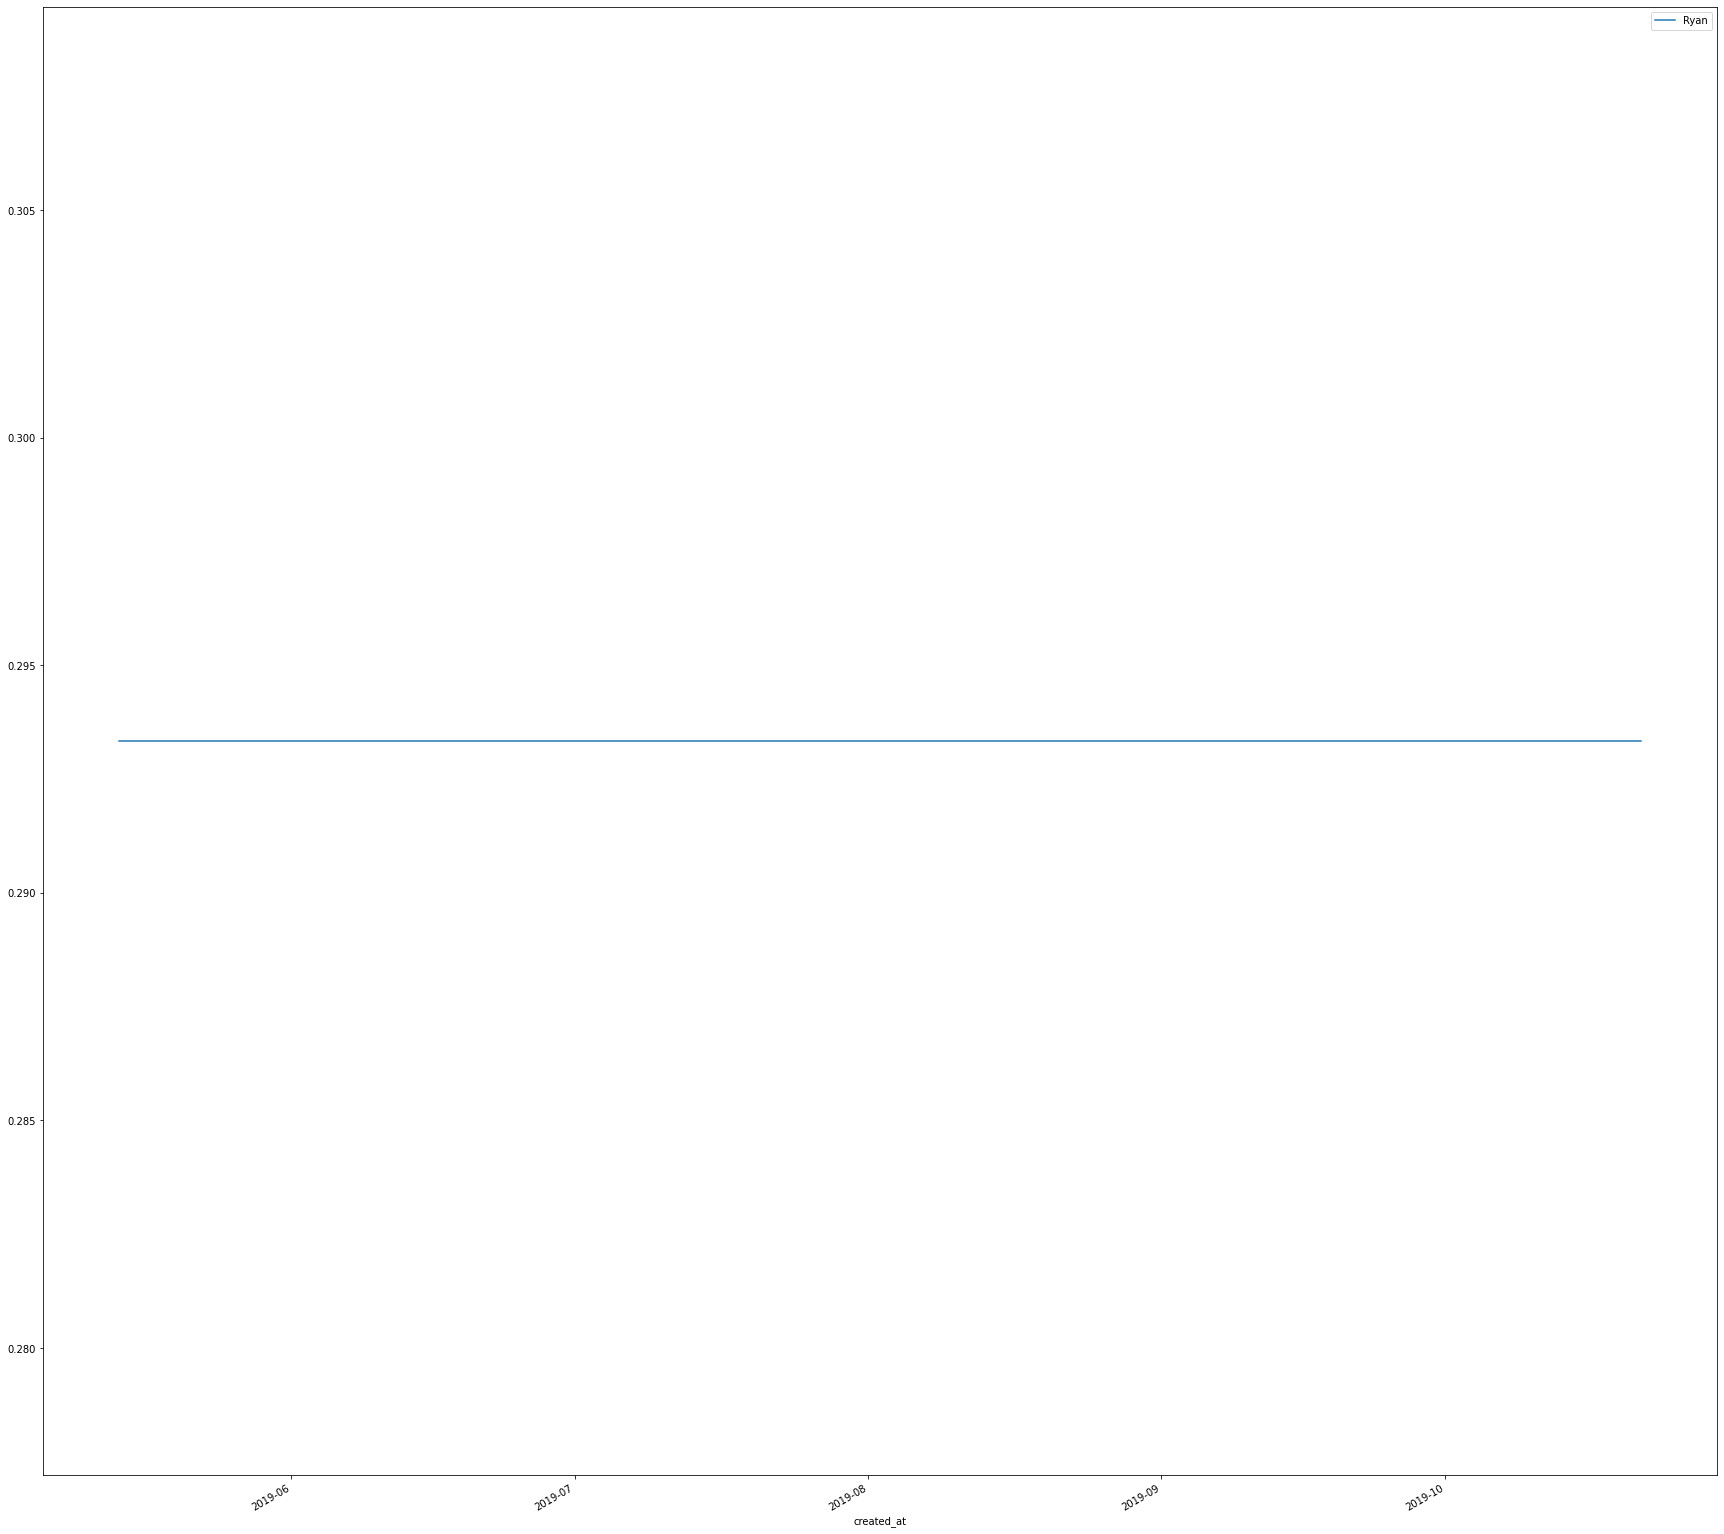

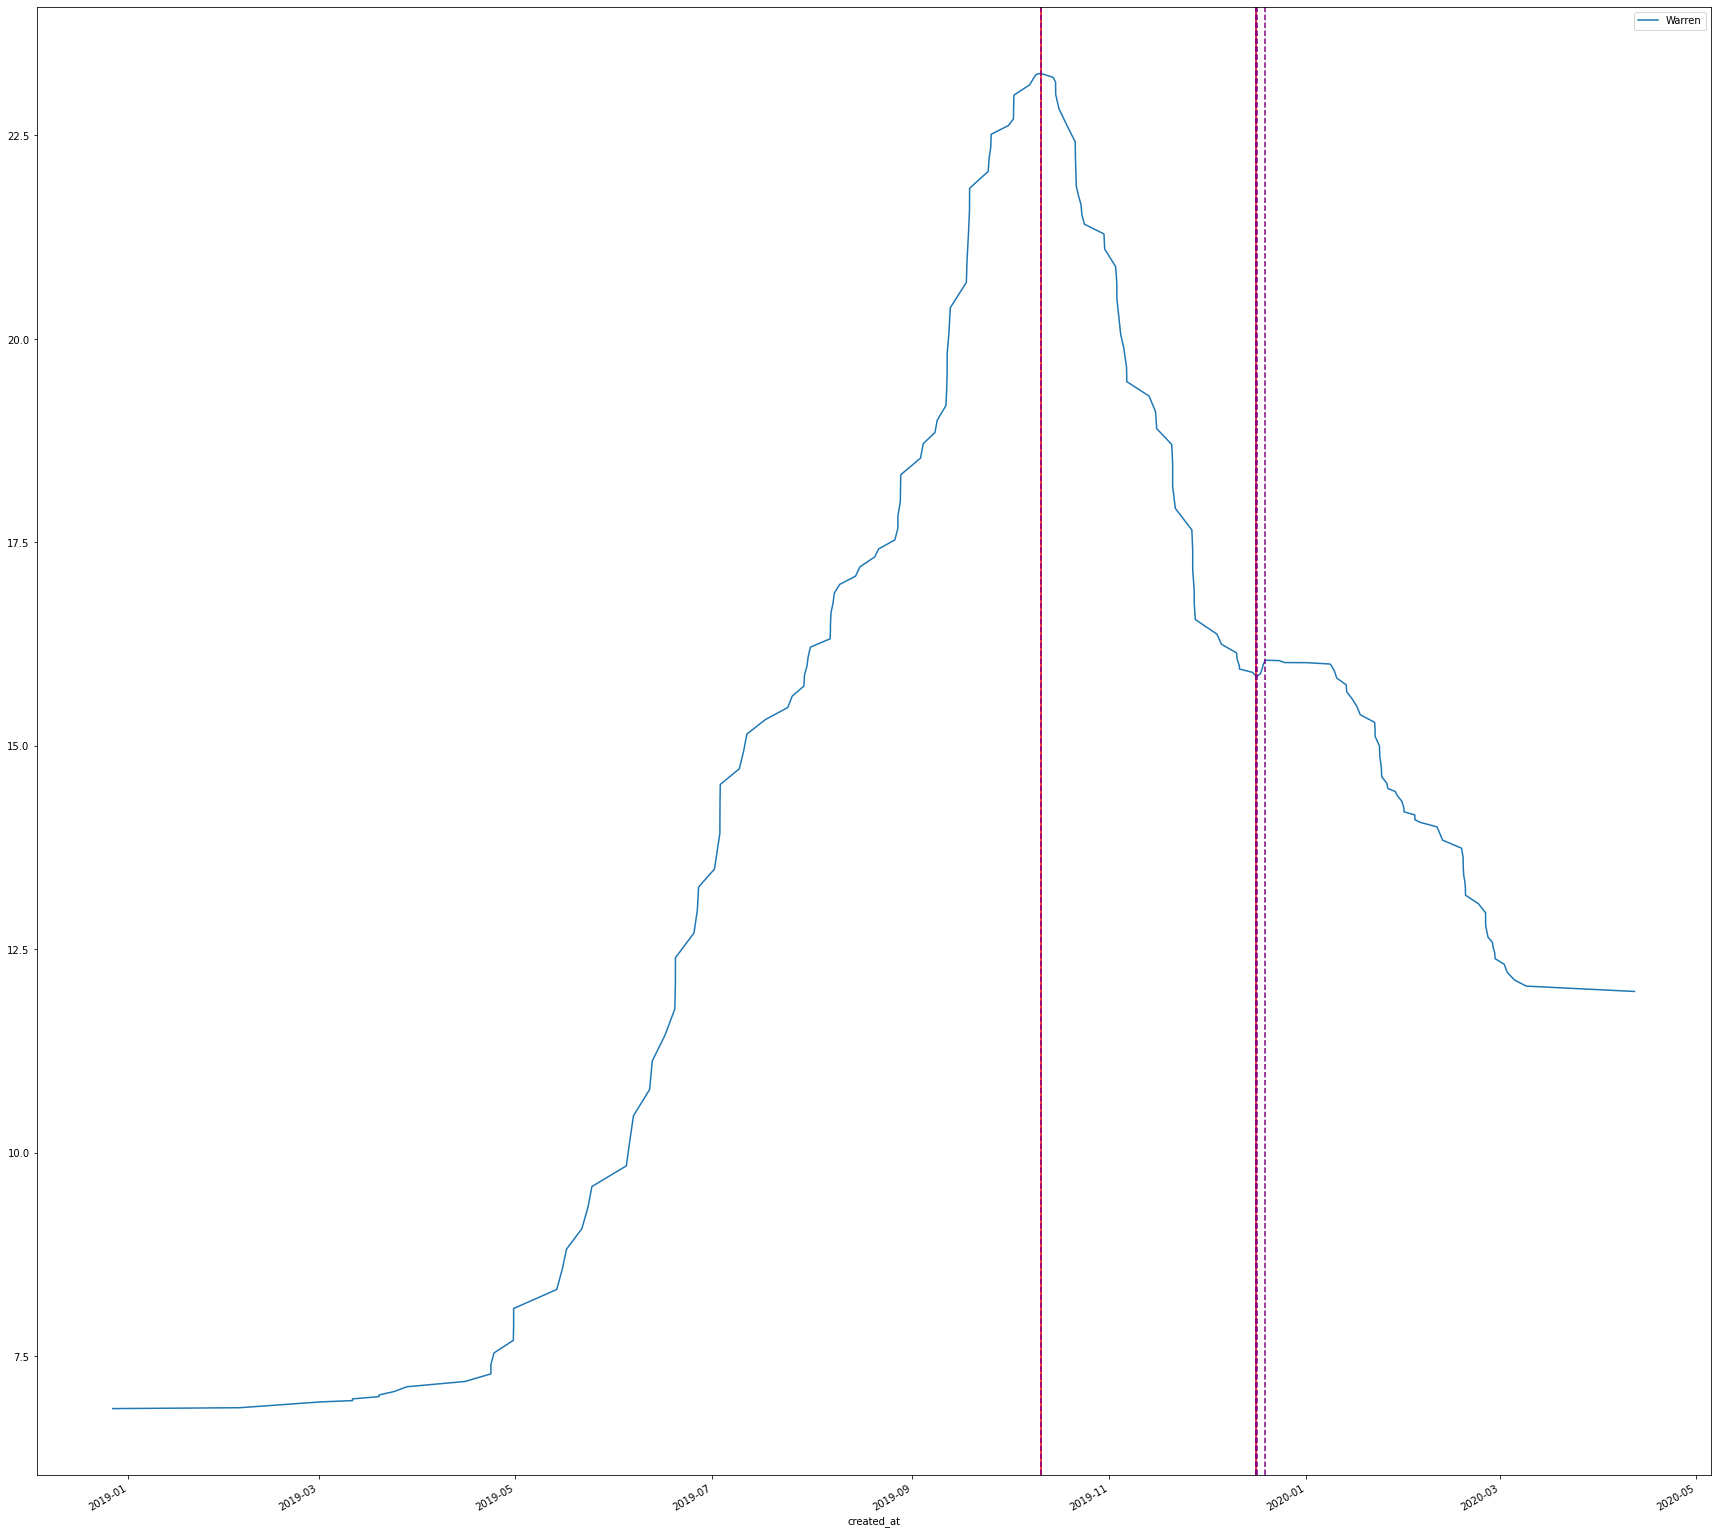

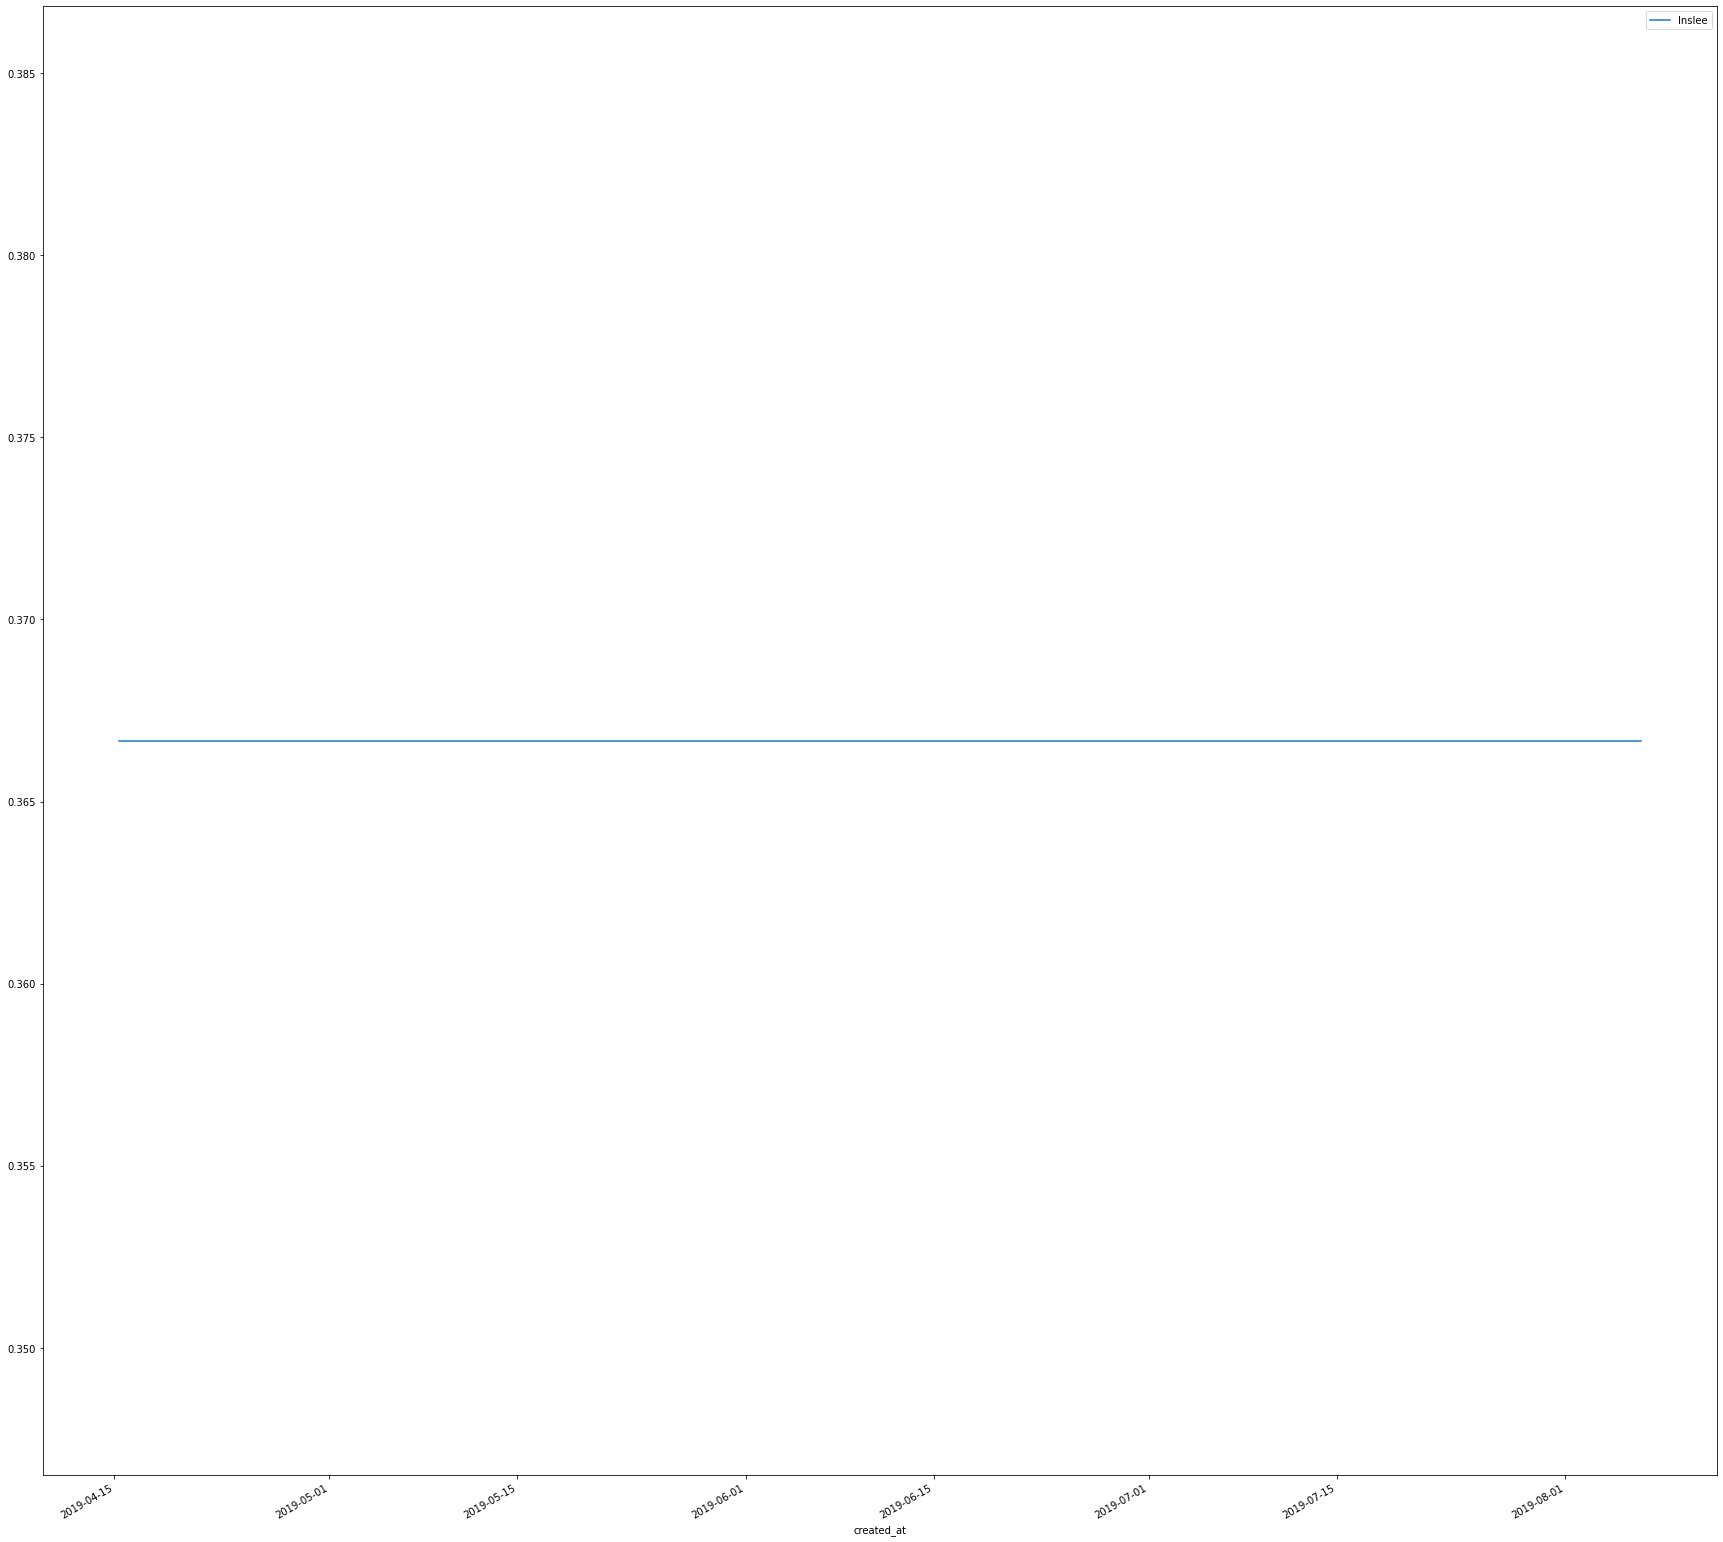

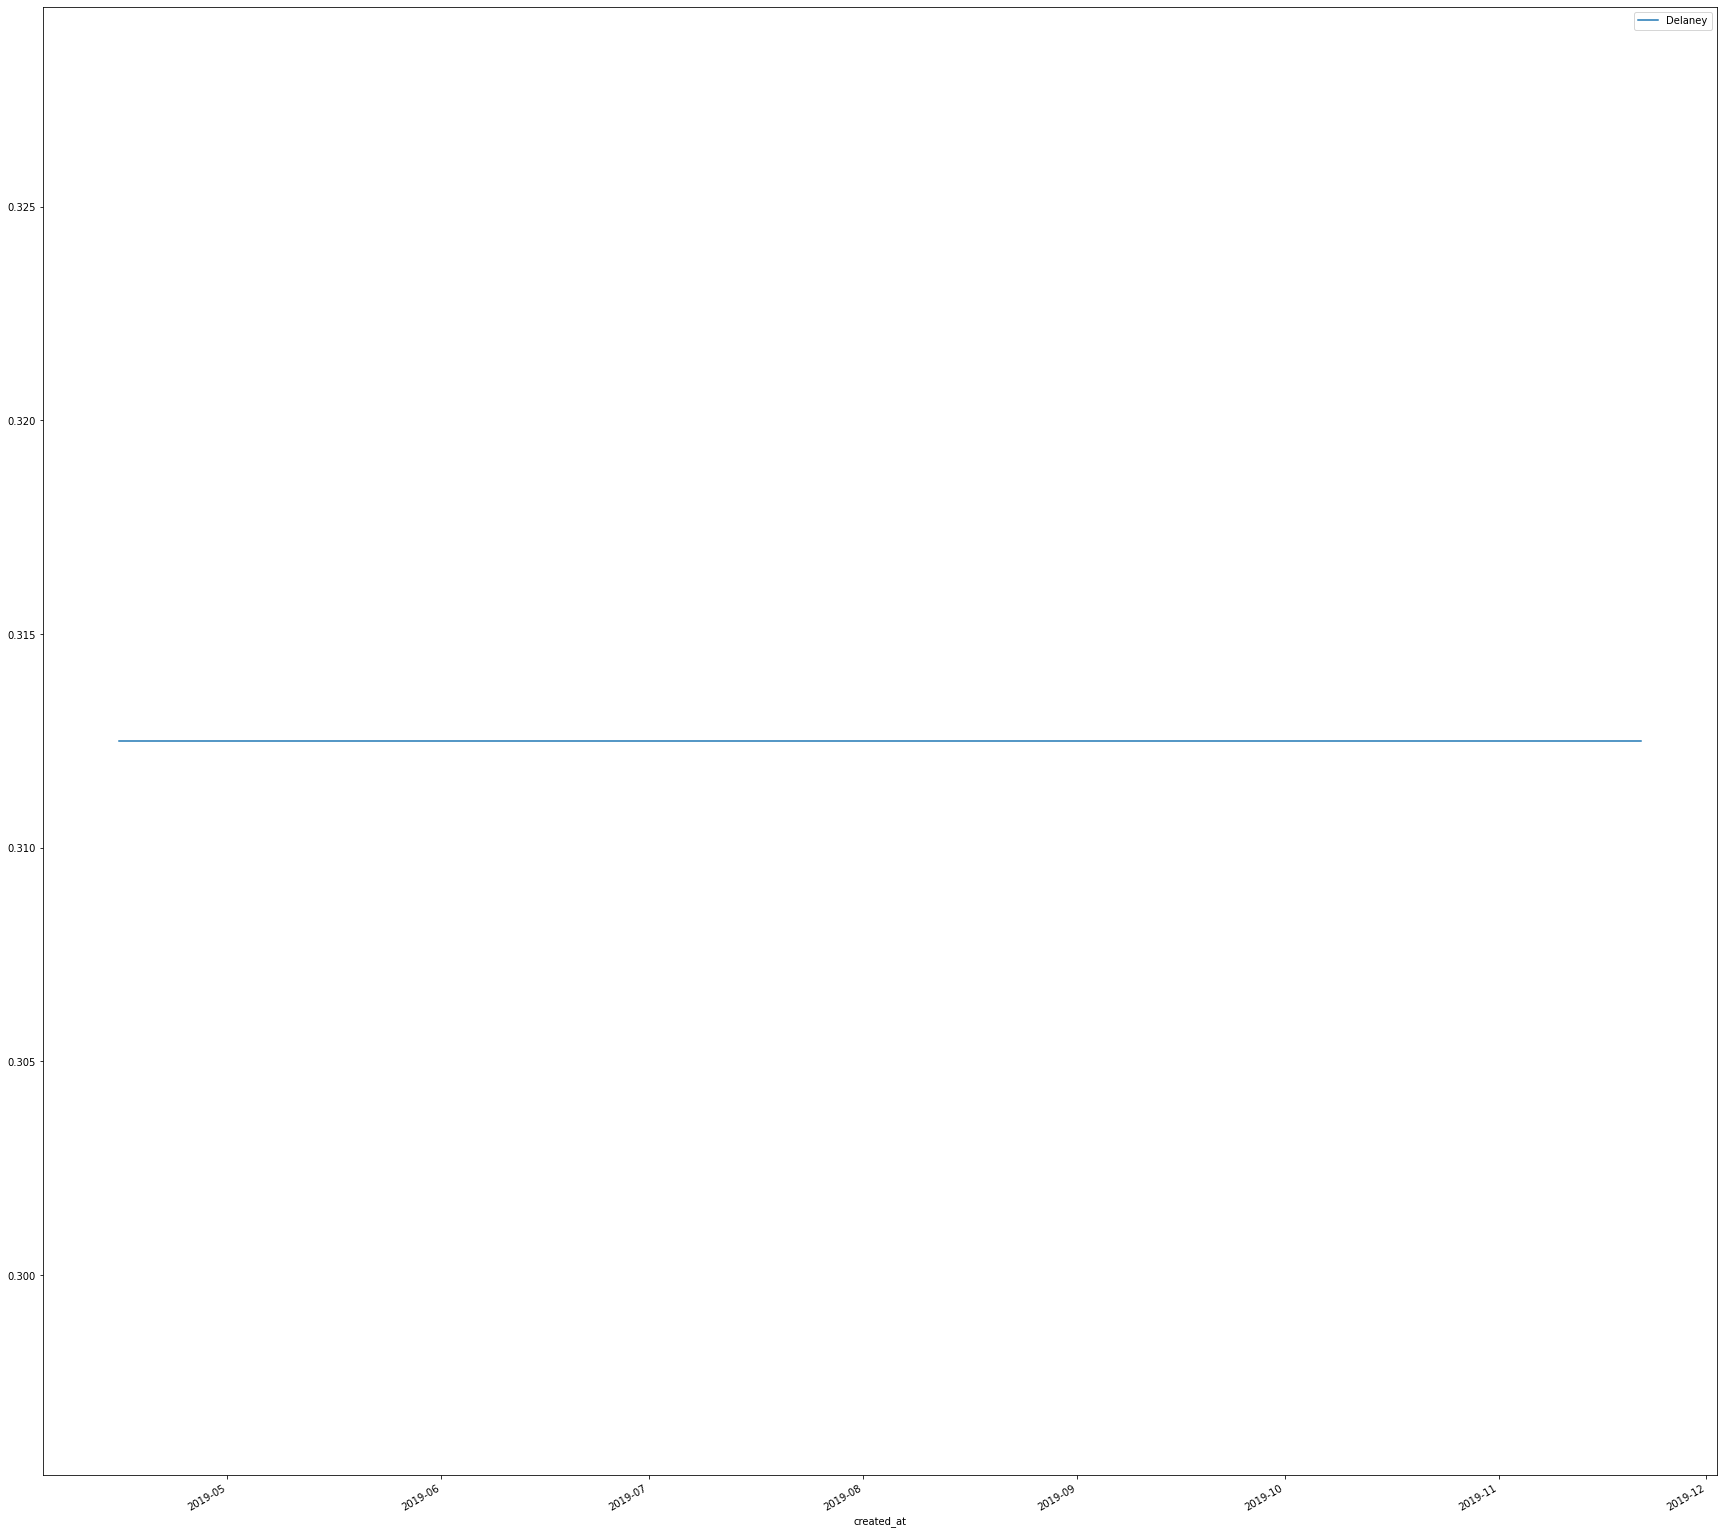

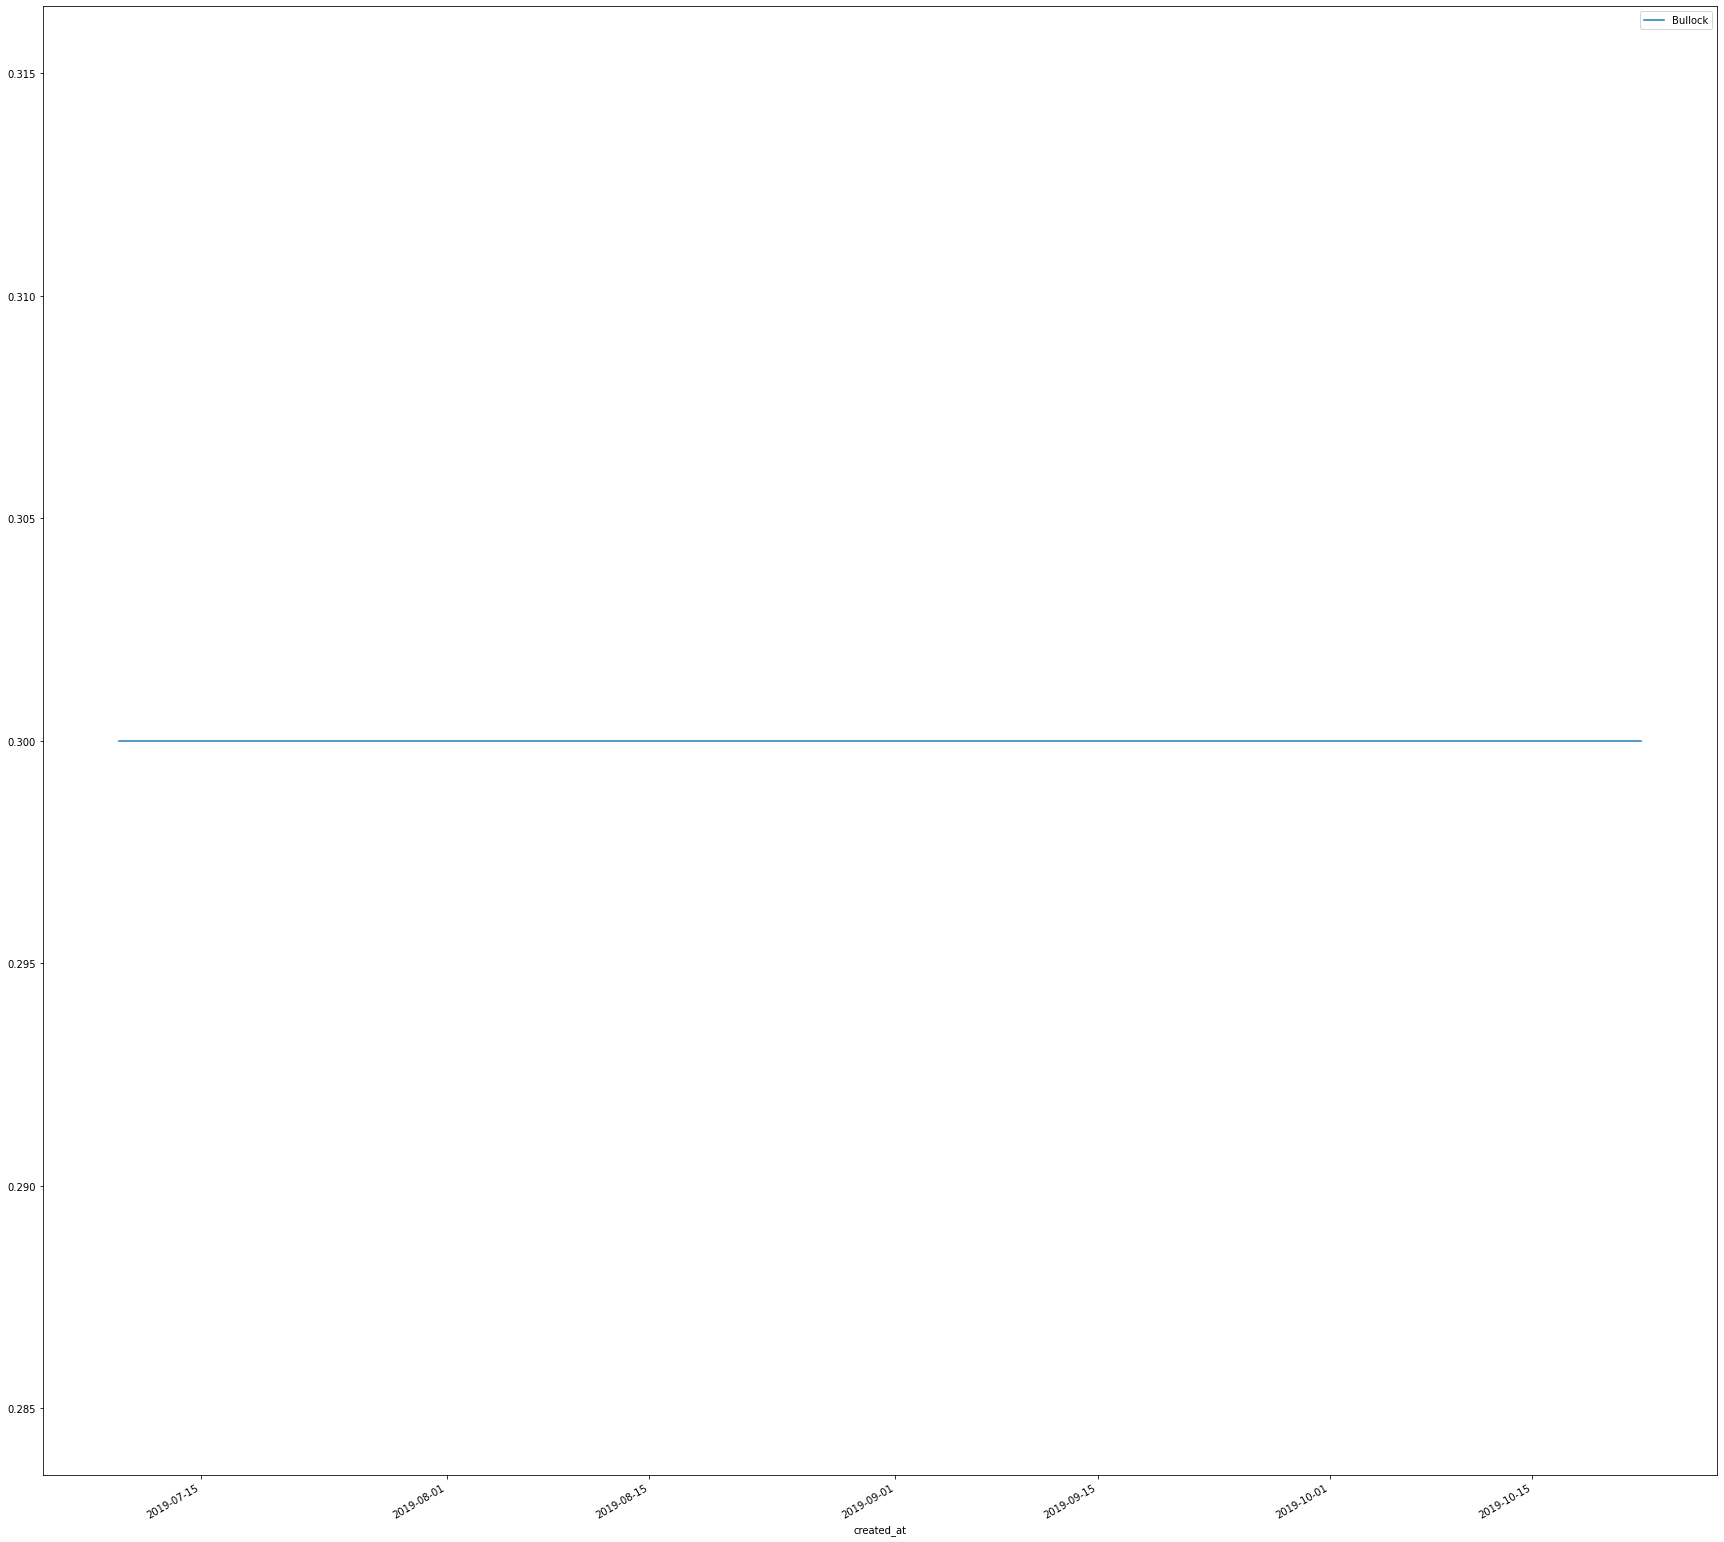

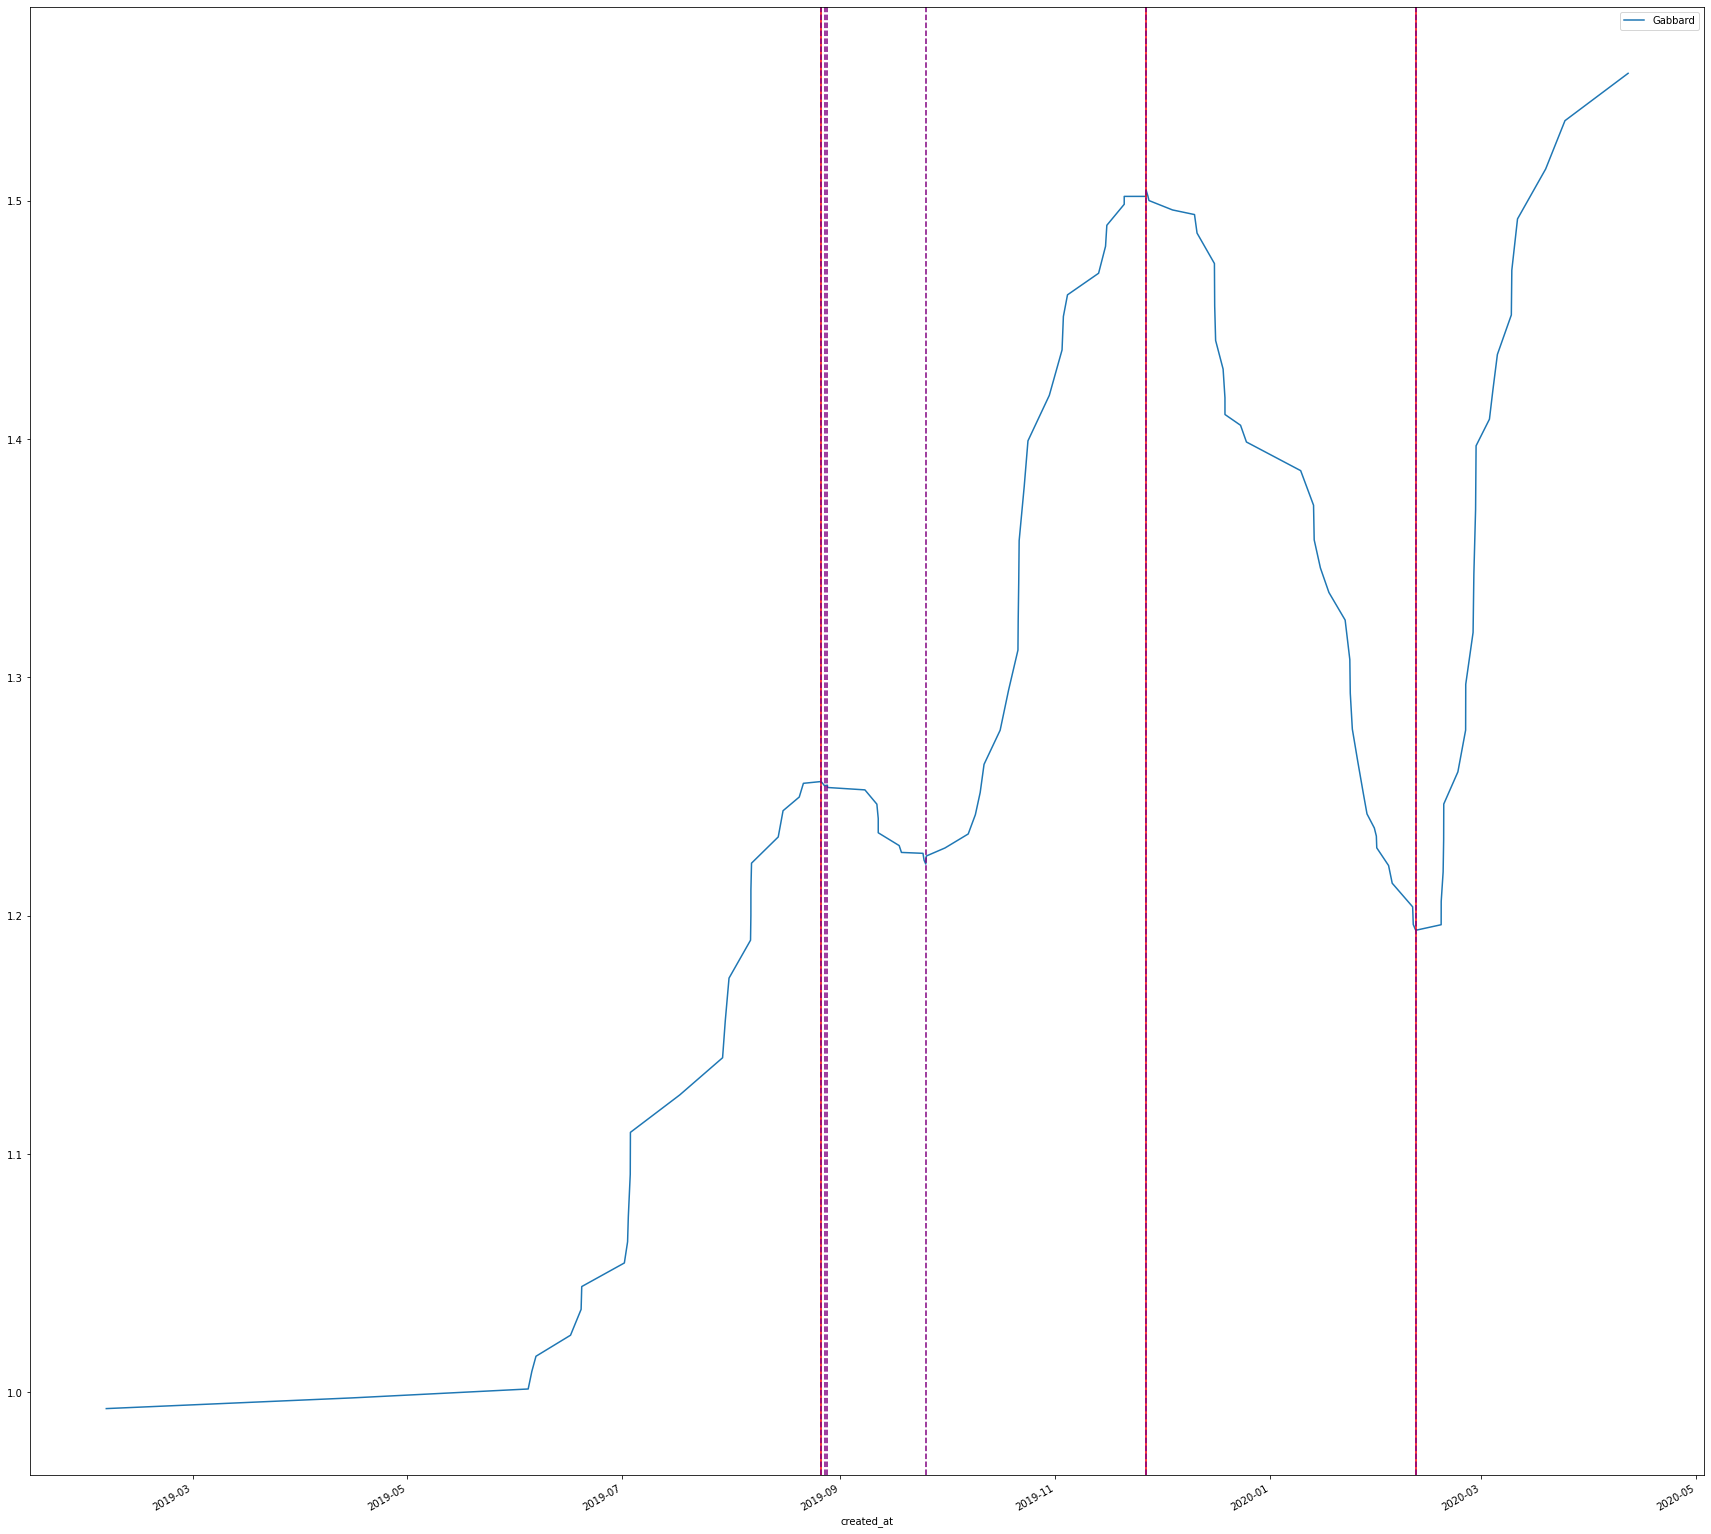

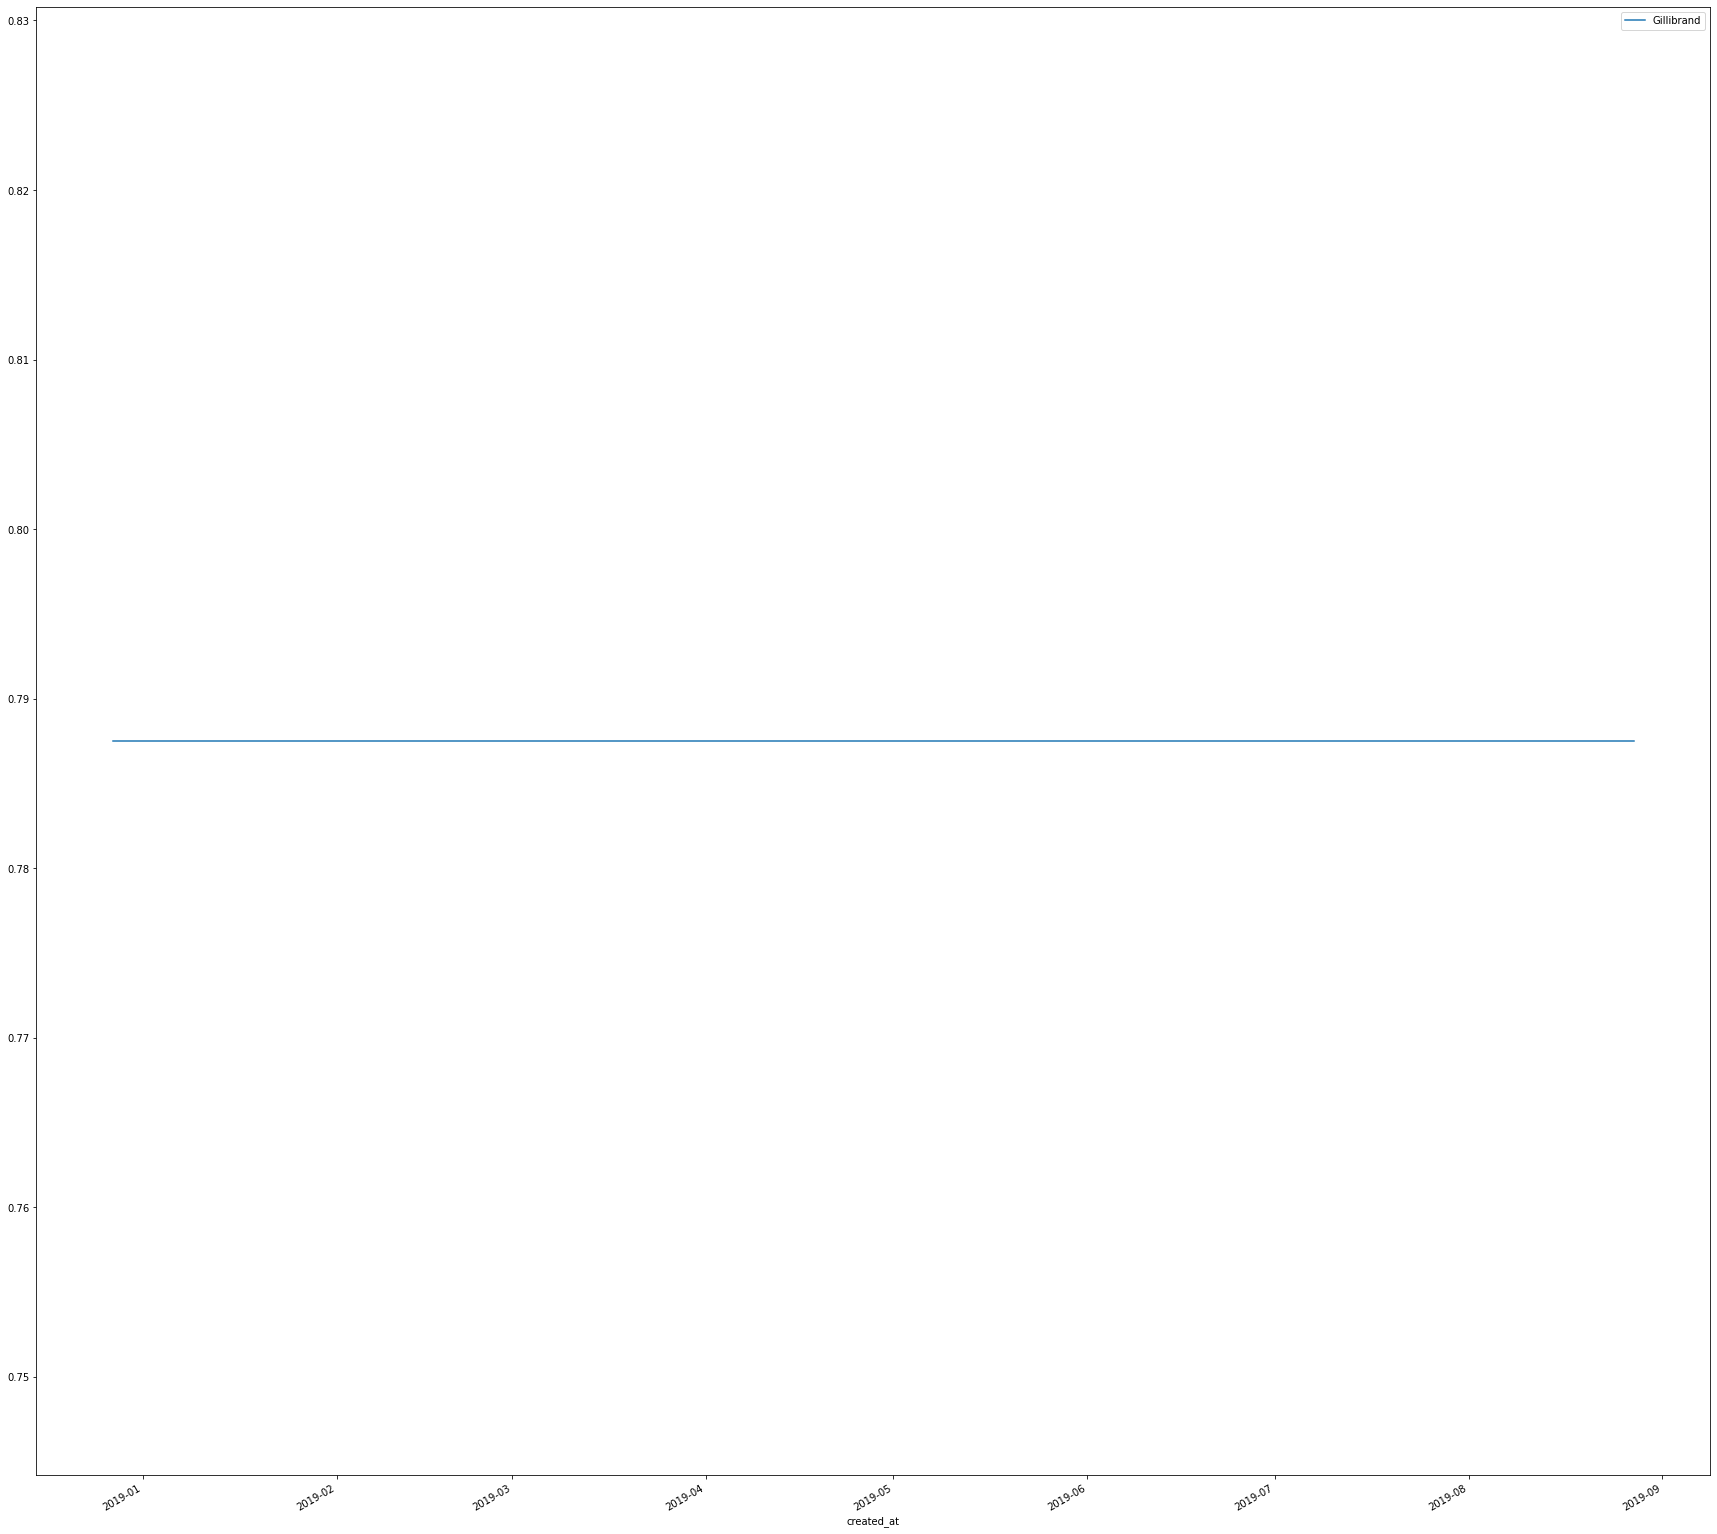

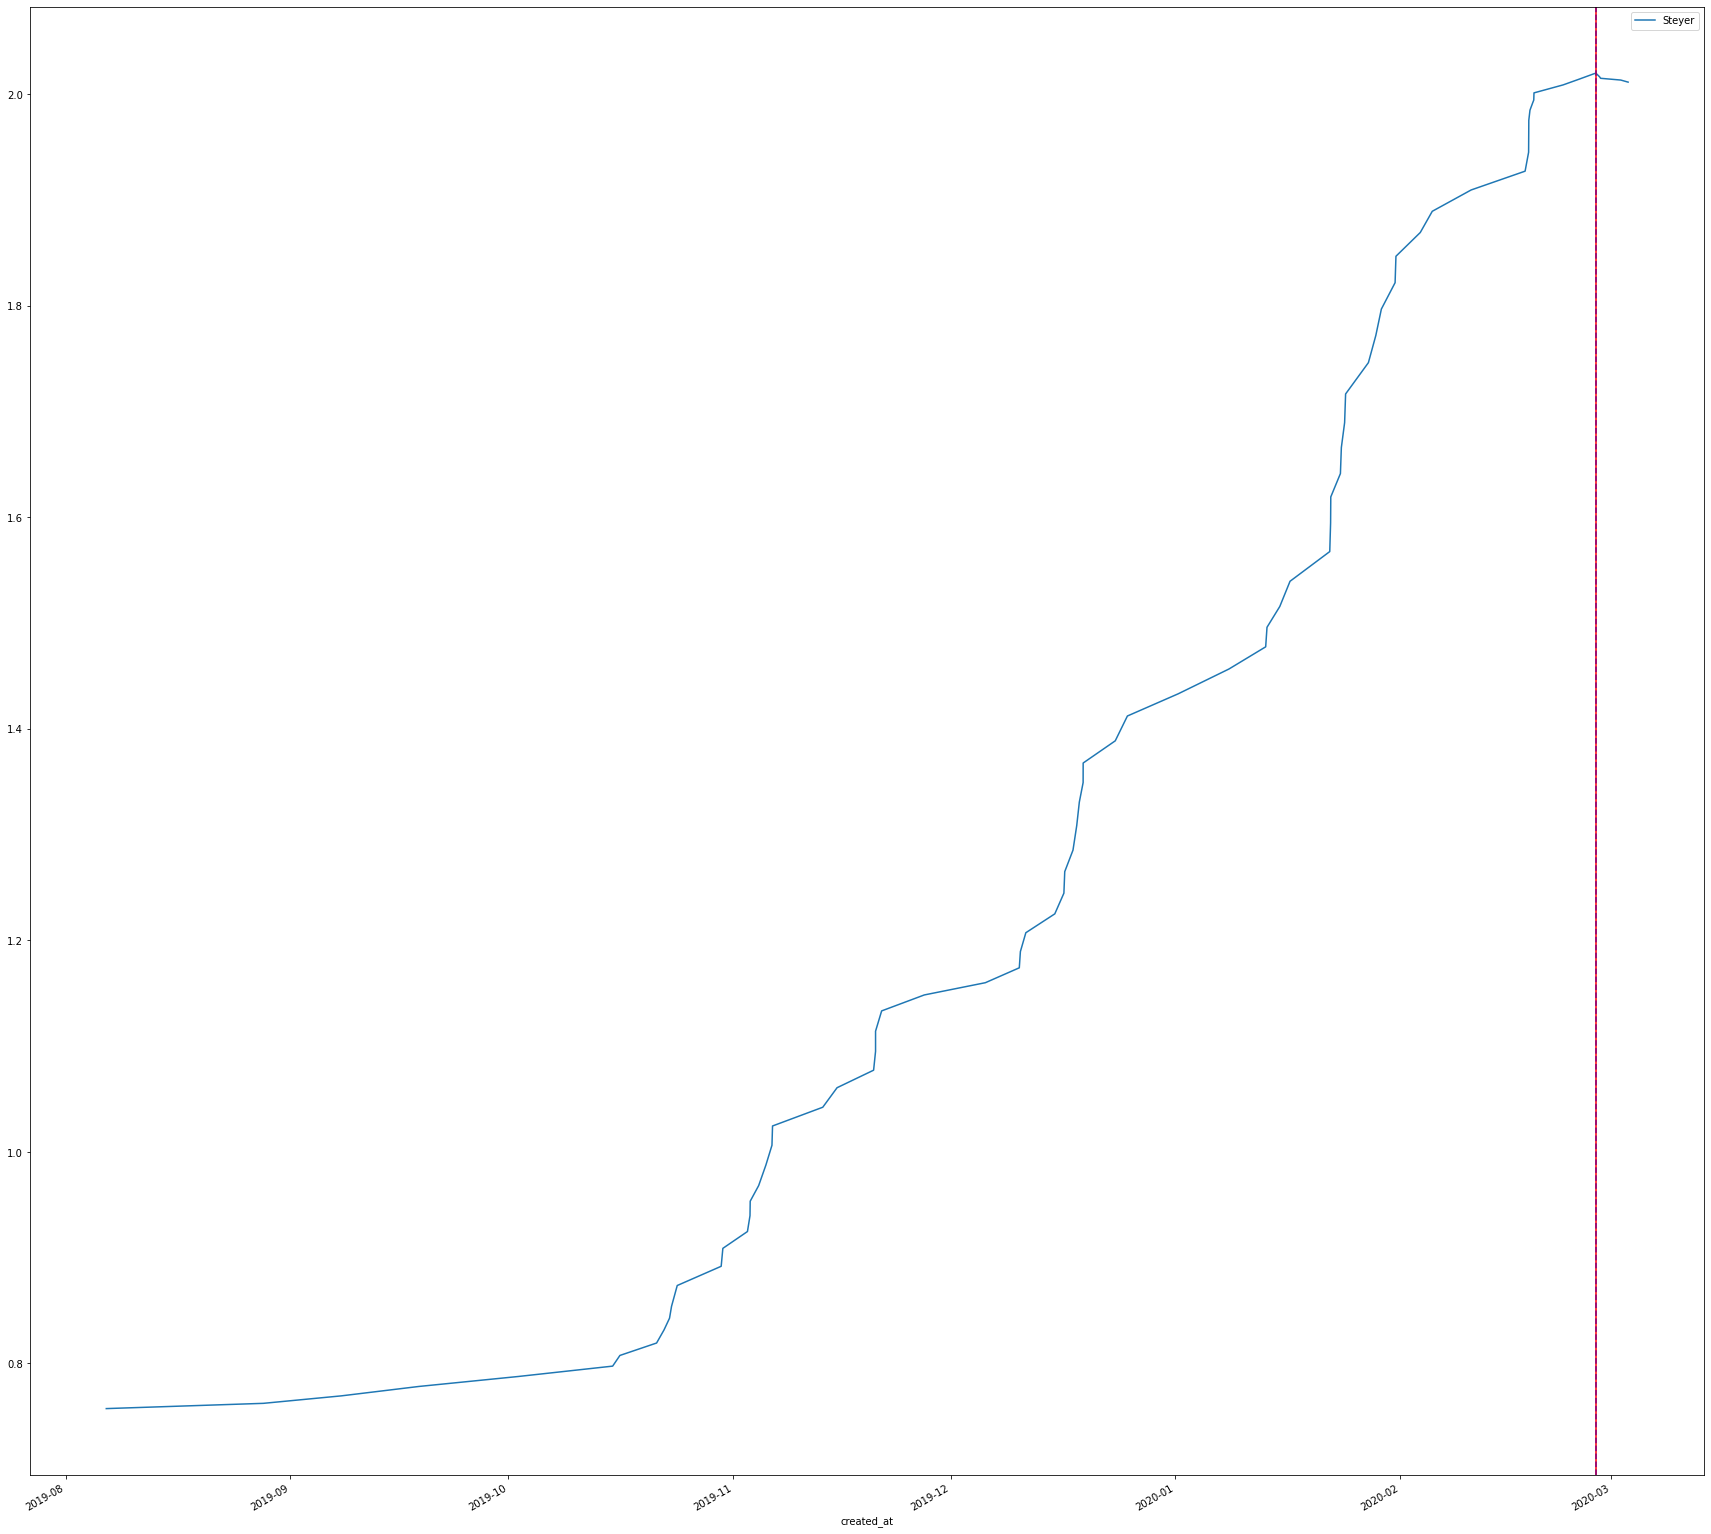

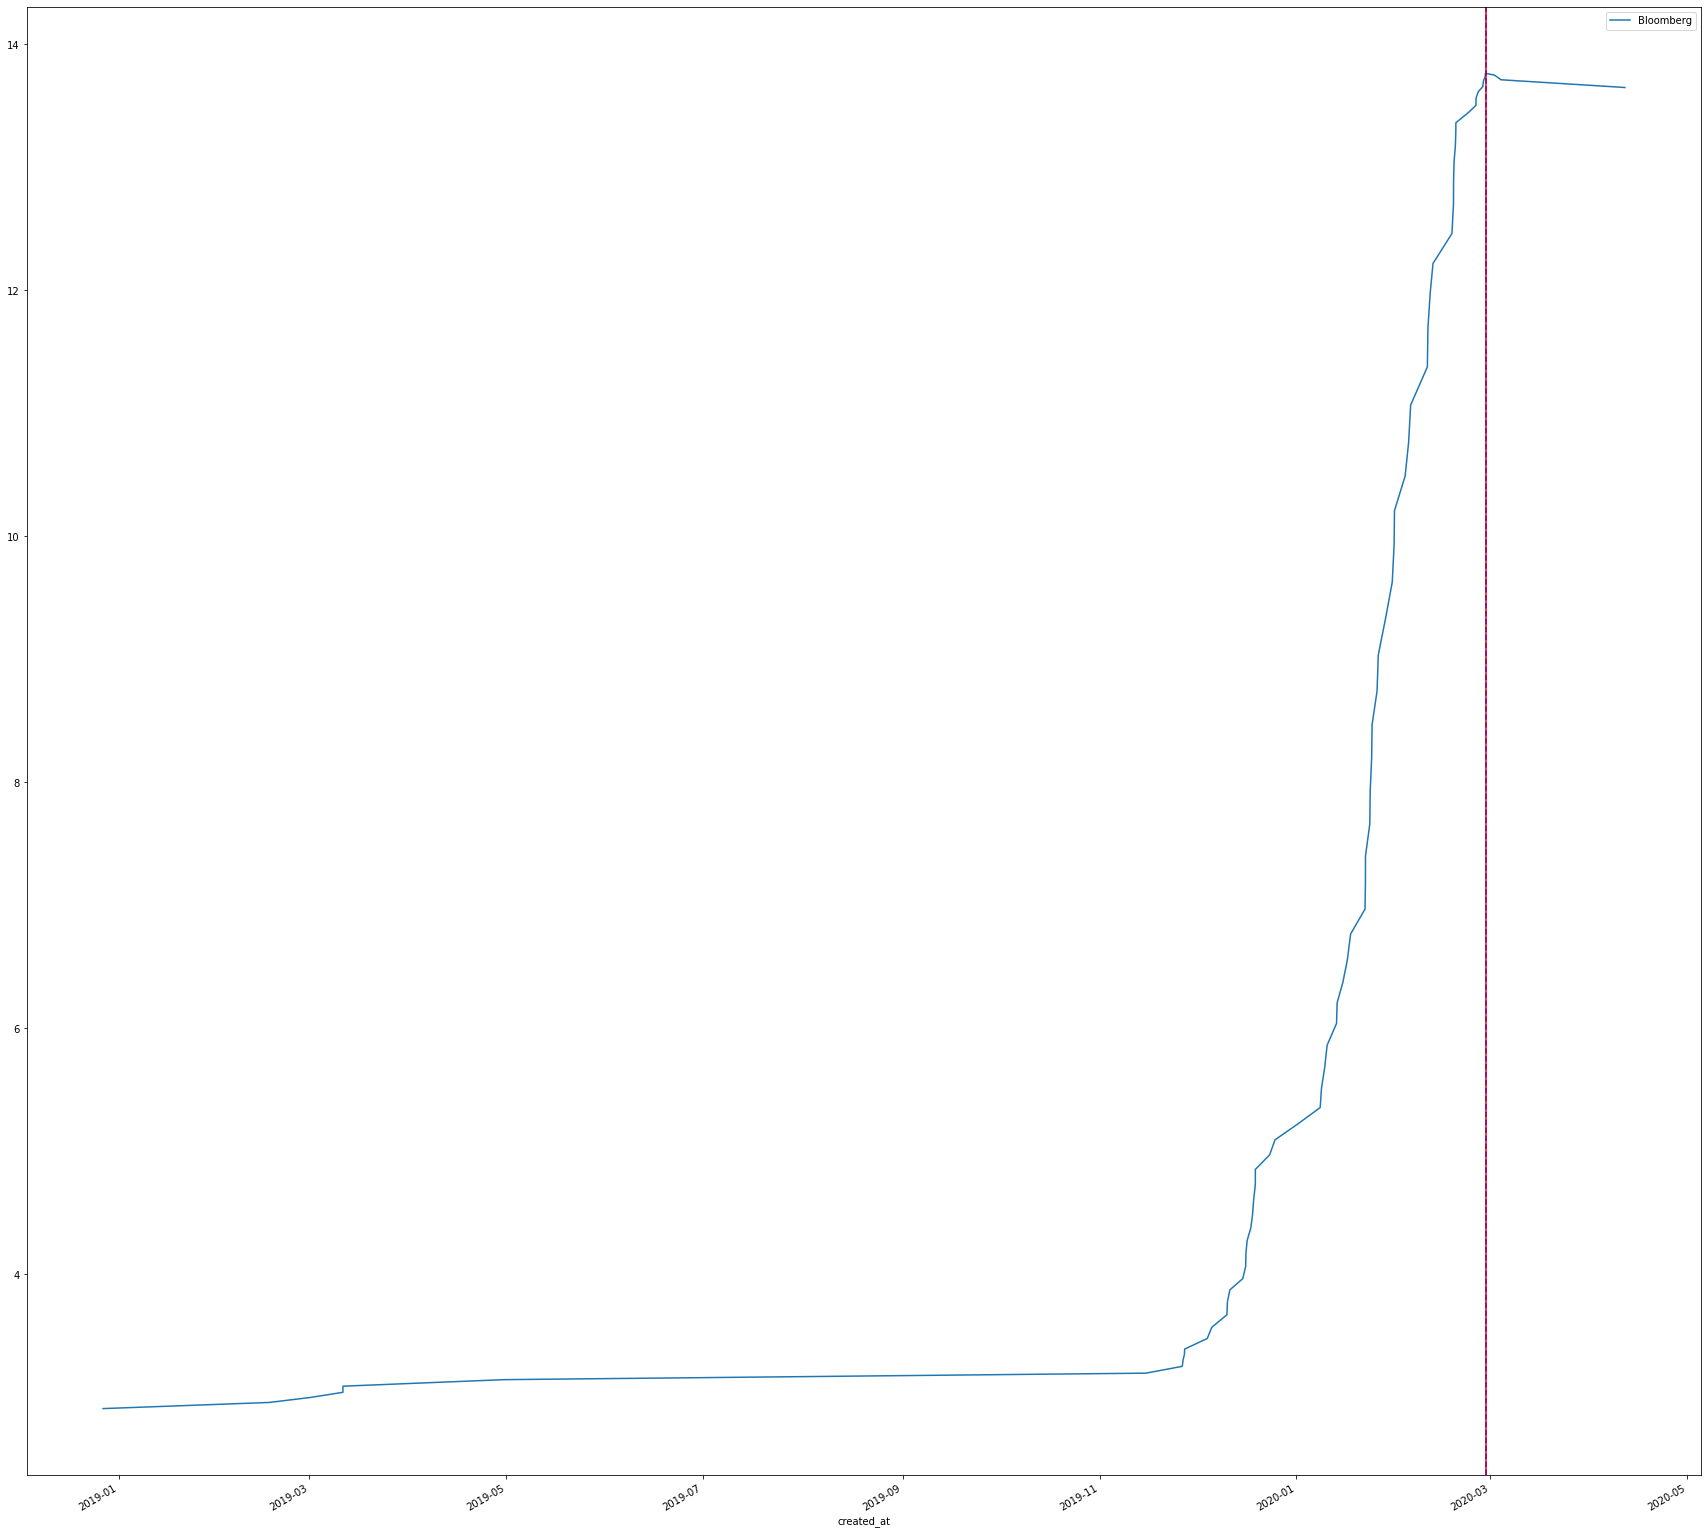

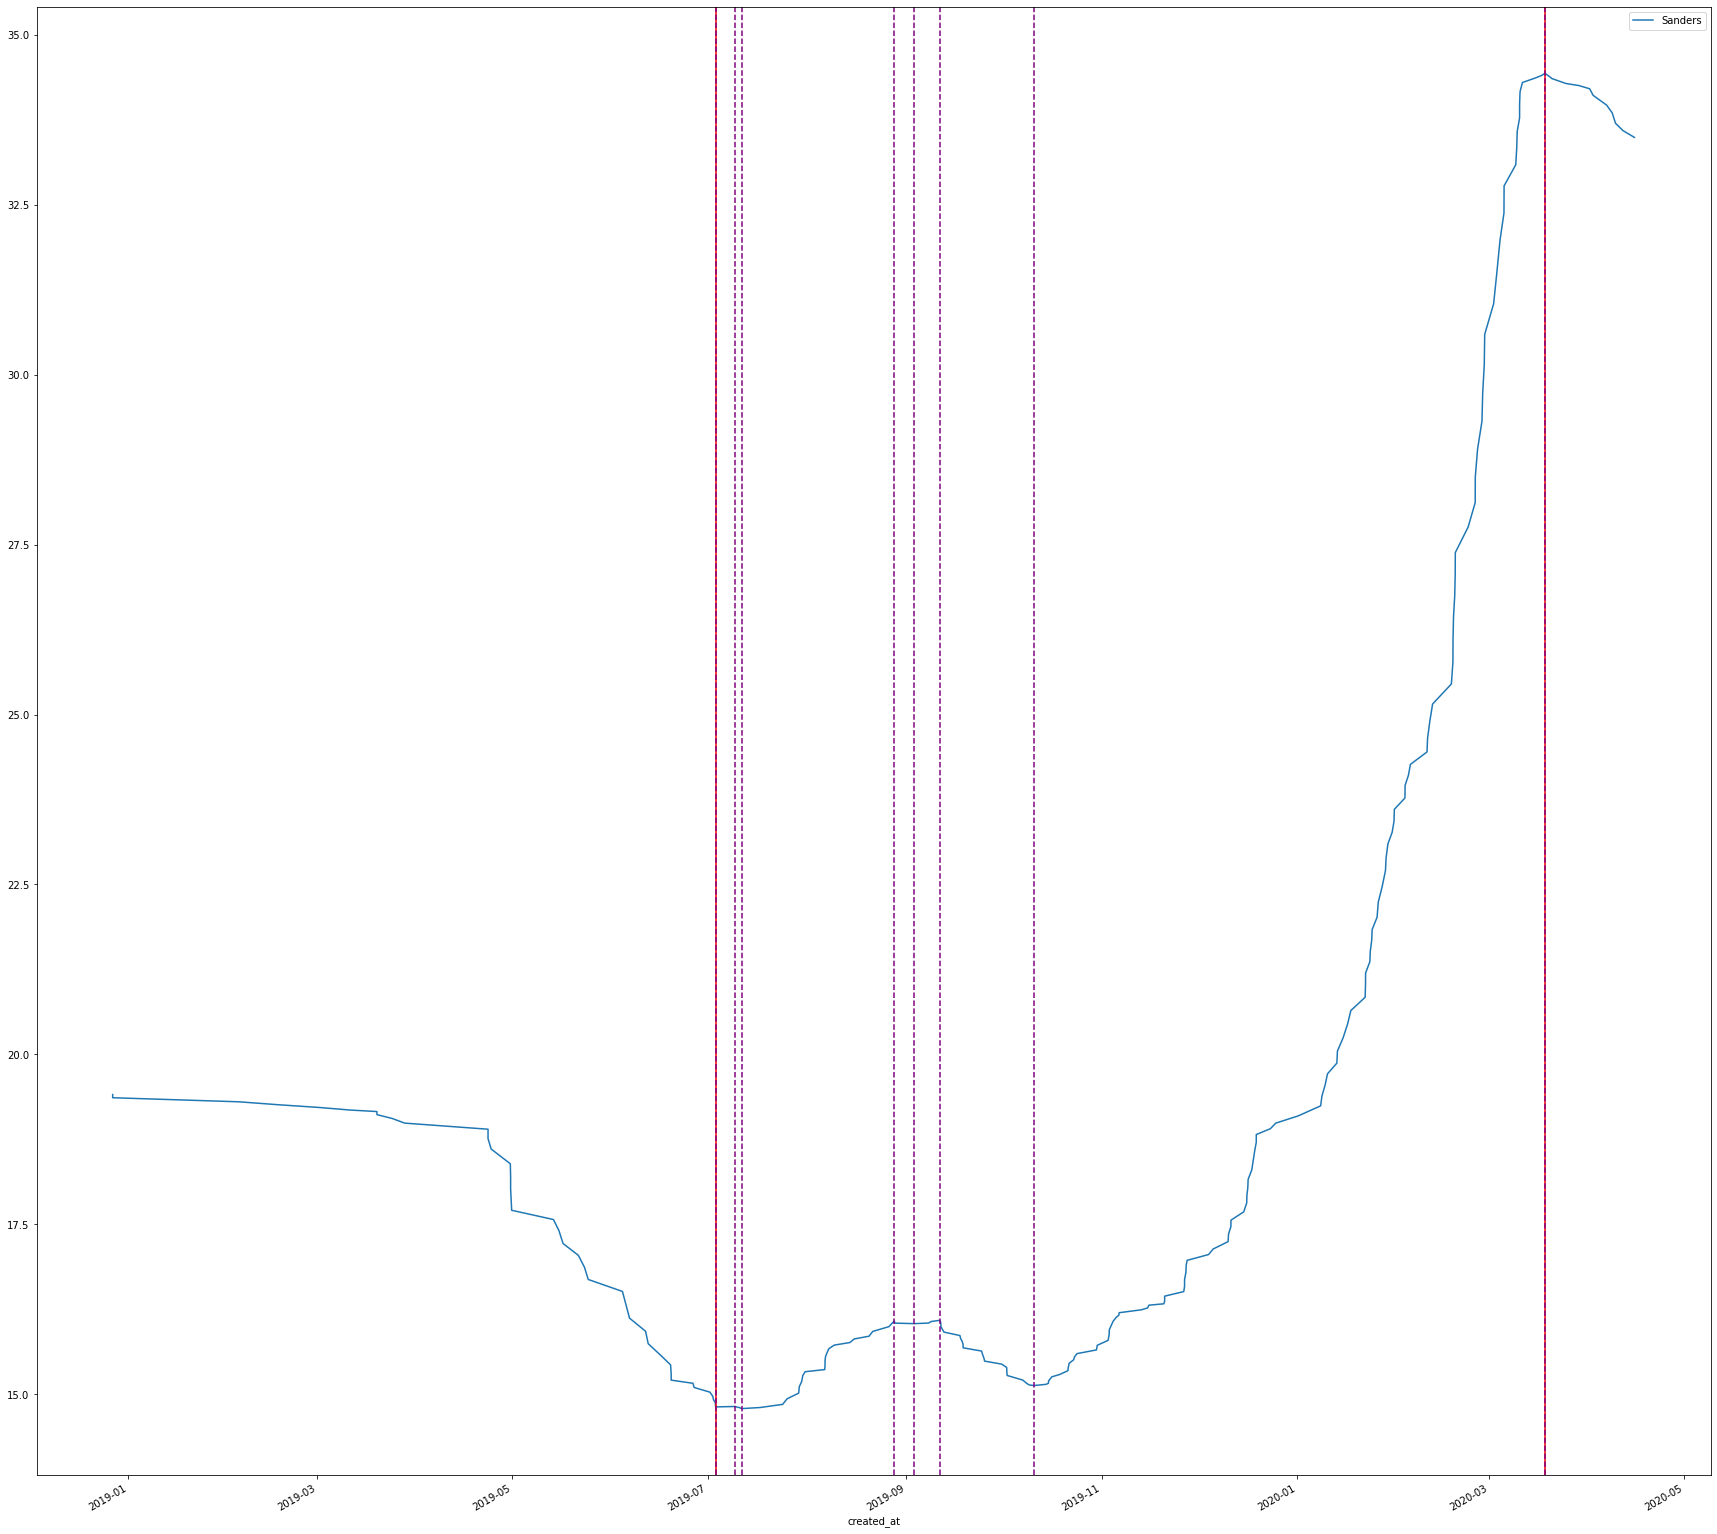

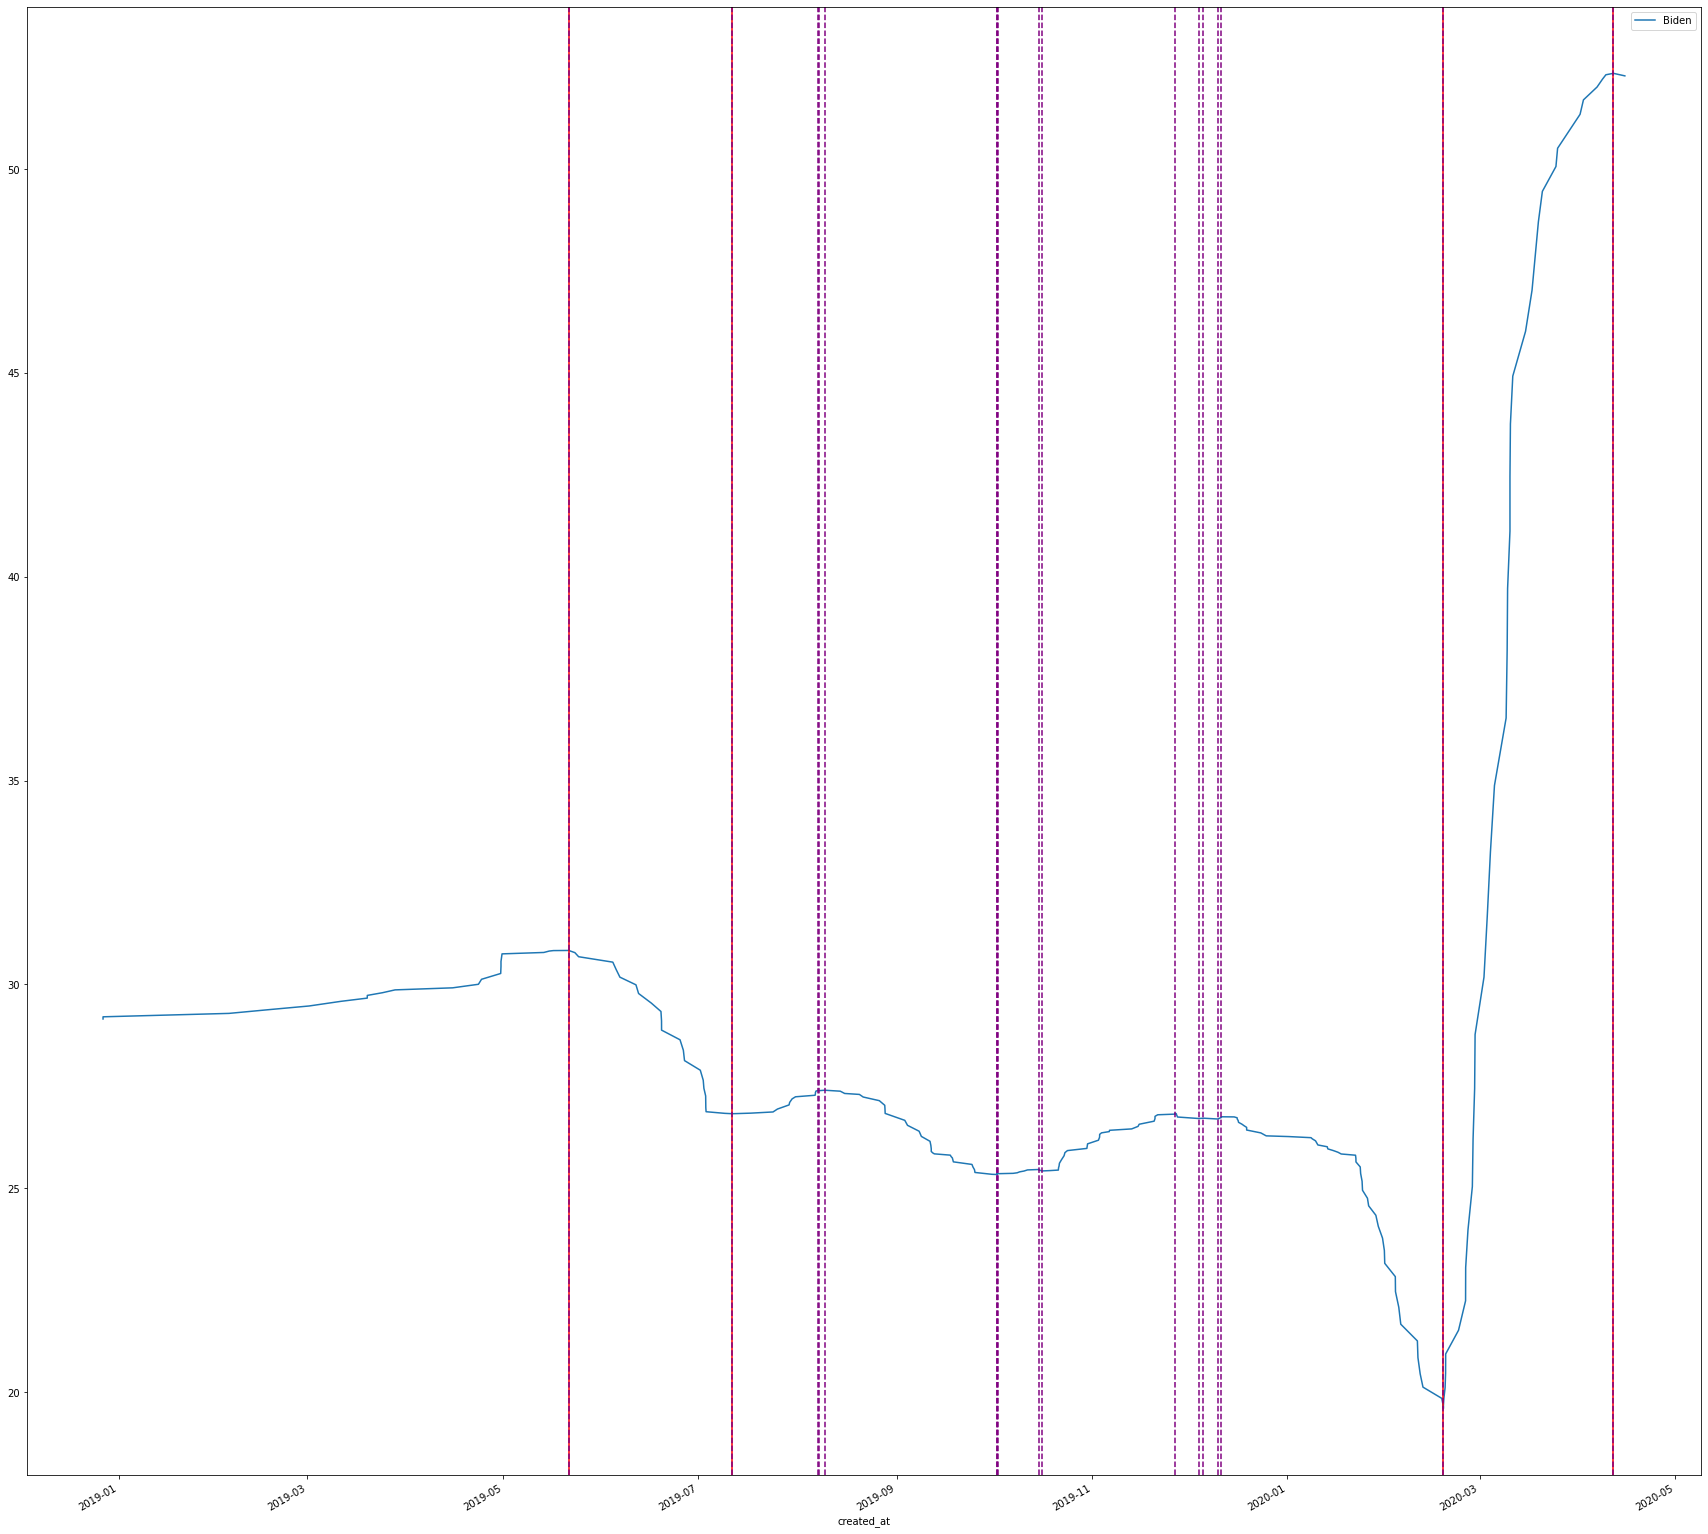

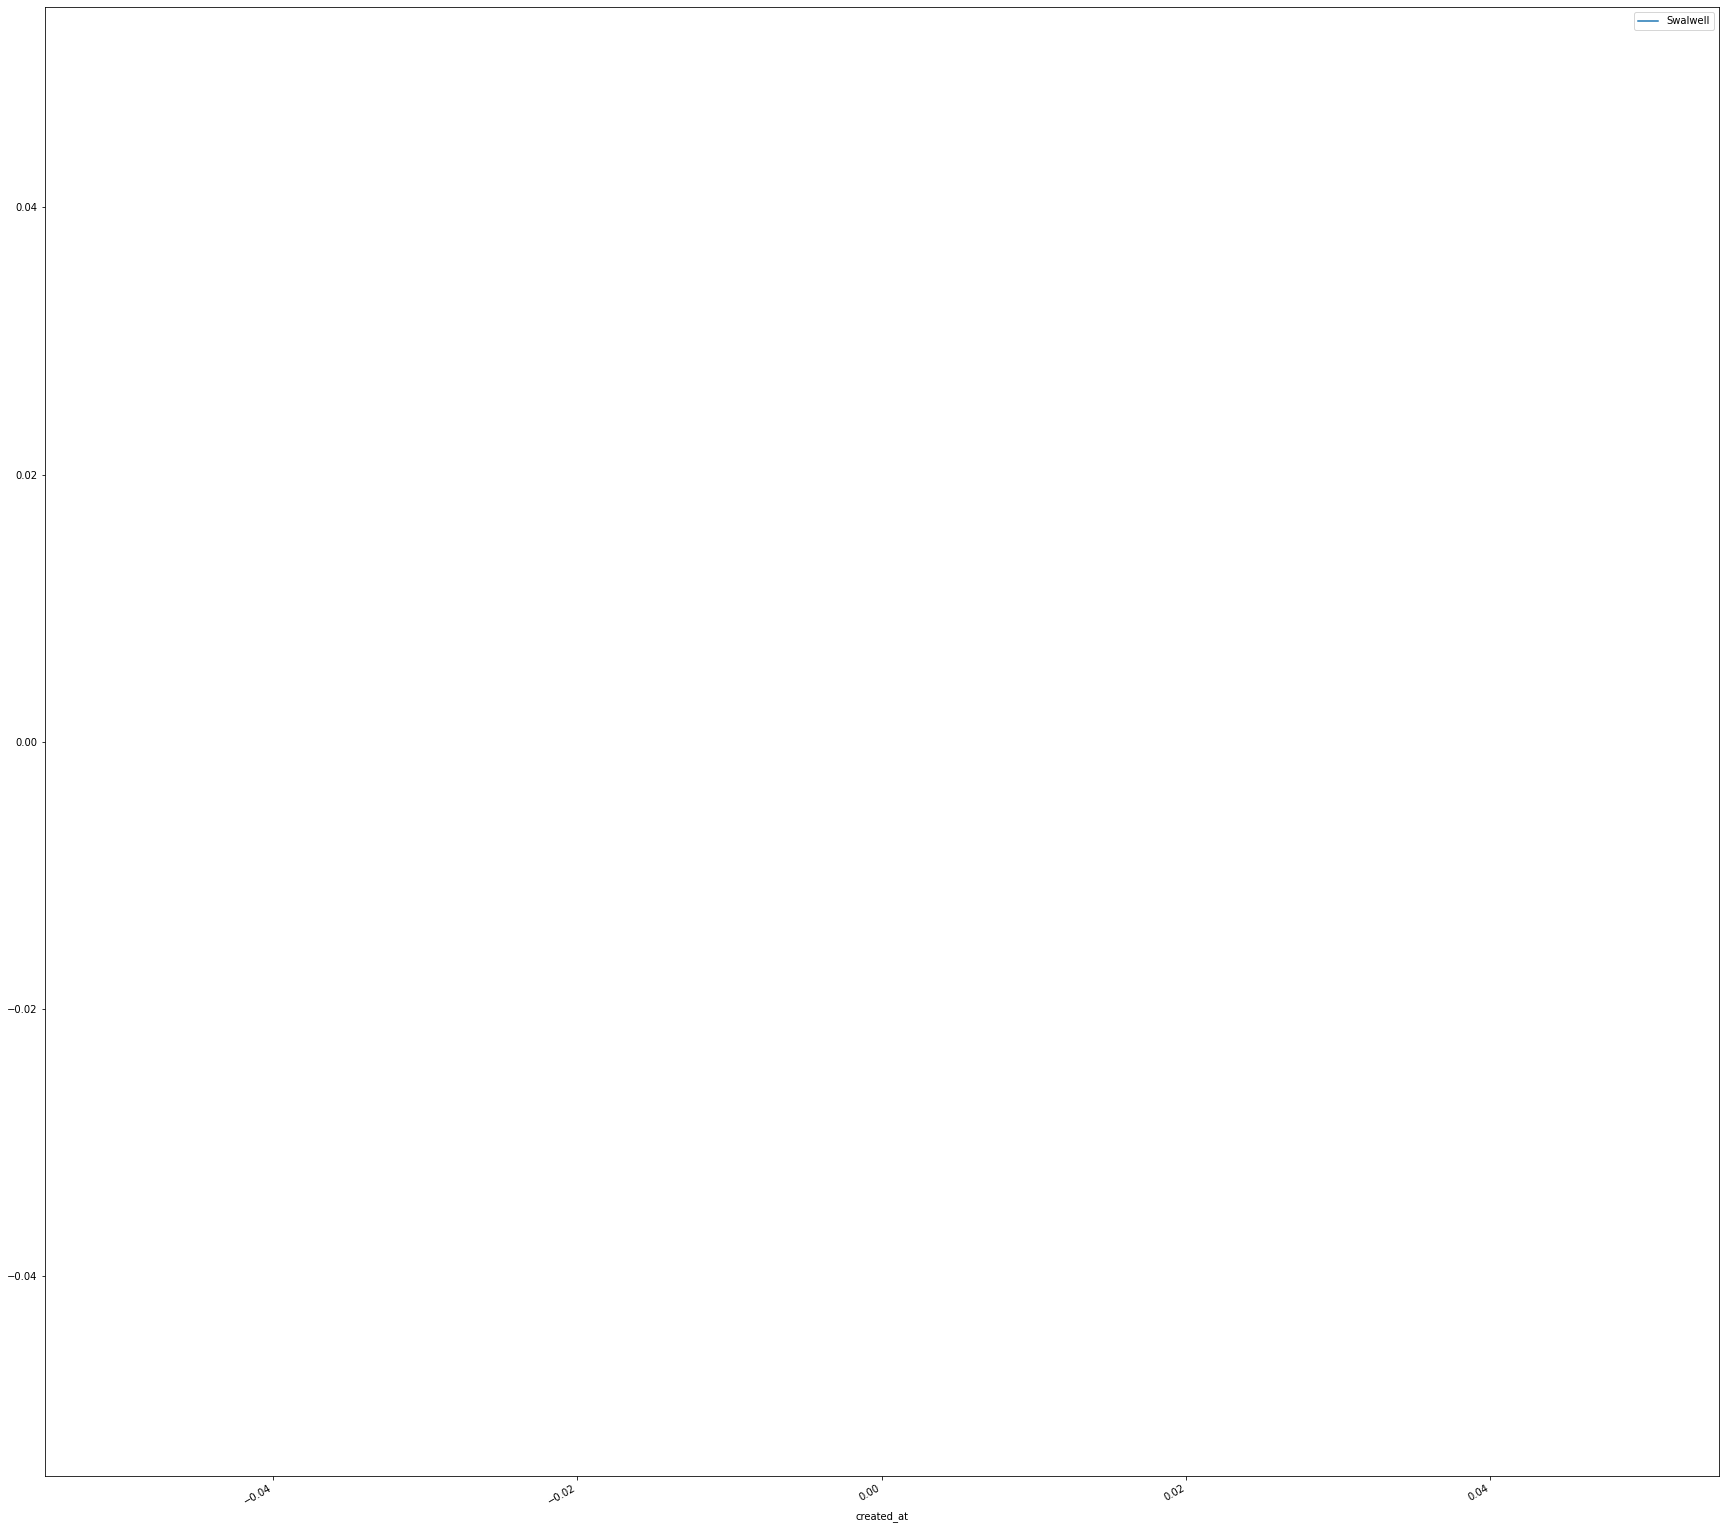

In [8]:
from scipy.signal import find_peaks

results = dict()
for x in set(df_filtered.answer):
    temp = get_temp(df_filtered, x)
    temp = do_derivative(temp)

    peaks1, _ = find_peaks(temp.avg_pct)
    peaks2, _ = find_peaks(-temp.avg_pct)
    peaks = np.concatenate([temp.avg_pct[peaks1], temp.avg_pct[peaks2]])
    peak_indices = np.concatenate([temp.index[peaks1], temp.index[peaks2]])
    peaks = peaks[np.argsort(peak_indices)]
    
    p = []
    for i in range(len(peaks)):
        if len(p) > 0:
            if np.abs(peaks[i] - peaks[p[-1]]) / min(peaks[i], peaks[p[-1]]) * 100 > 10:
                p.append(i)
        else:
            p.append(i)

    results[x] = np.sort(peak_indices)[p]
            
    ax = plt.gca()
    temp.plot(kind='line', x='created_at', y='avg_pct', label=x, ax=ax, figsize=(30, 30))
    for y in np.sort(peak_indices)[p]:
        plt.axvline(y, color='red')
    for y in peak_indices:
        plt.axvline(y, color='purple', linestyle='--')
        
    plt.show()

In [17]:
from datetime import datetime

nice_results = dict()

for k, v in results.items():
    candidate = next(x for x in c if k in x)
    
    if len(v) > 0:
        nice_results[candidate] = [str(pd.Timestamp(x)) for x in v]
        
print(nice_results)

{'Pete Buttigieg': ['2019-06-19 09:17:00', '2019-08-27 12:39:00', '2019-12-11 09:07:00', '2020-01-22 10:02:00', '2020-02-28 11:21:00'], 'Kamala Harris': ['2019-05-21 13:46:00', '2019-07-17 09:49:00', '2019-10-21 13:08:00'], 'Amy Klobuchar': ['2019-08-07 19:28:00', '2020-02-19 09:38:00'], 'Cory Booker': ['2019-07-24 09:11:00', '2019-09-11 09:37:00', '2019-10-21 19:38:00', '2019-12-16 15:02:00'], 'Andrew Yang': ['2019-04-30 08:12:00', '2019-10-10 18:00:00', '2020-01-31 06:50:00'], 'Michael Bennet': ['2019-09-17 17:40:00'], 'Julián Castro': ['2019-06-12 09:33:00'], 'Marianne Williamson': ['2019-10-22 12:01:00'], 'Elizabeth Warren': ['2019-10-10 18:00:00', '2019-12-16 08:39:00'], 'Tulsi Gabbard': ['2019-08-26 13:48:00', '2019-11-26 21:19:00', '2020-02-11 11:10:00'], 'Tom Steyer': ['2020-02-27 23:38:00'], 'Mike Bloomberg': ['2020-02-28 14:44:00'], 'Bernie Sanders': ['2019-07-03 11:28:00', '2020-03-18 09:40:00'], 'Joe Biden': ['2019-05-21 13:46:00', '2019-07-11 17:02:00', '2020-02-18 16:59:0

In [18]:
import json
with open('app/data/polling.json', 'w') as f:
    json.dump(nice_results, f)